Employee attrition prediction using machine learning based predictive analytics - Evaluate the supervised ML models using data preprocessing techniques.

Import the required packages

In [1]:
# Data Exploration and Manipulation
import pandas as pd
import numpy as np
from collections import Counter
import warnings

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Selection and Validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance

# Handling Imbalance data by minority Oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# pip install plotly

In [3]:
# pip install xgboost

In [4]:
# pip install imblearn

Read the data which has 1470 observations and 35 features

In [5]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

Perform Exploratory data analysis

check the sample records

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Find missing values check

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dataset summary

The chosen dataset has both categorical and continuous data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observe the descriptive statistics like count, number of unique values, most frequently occuring value, no of times the most frequent value occurred

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


identify and segregate numerical and categorical features in the dataset 

Different Visualisation/transformation technique is applied for numeric /categorical features 

In [11]:
cat_cols = [i for i in df.columns if df[i].dtype == 'object']
num_cols = [i for i in df.columns if df[i].dtype != 'object']
len(cat_cols), len(num_cols)

(9, 26)

Function to identify outliers

In [12]:
def outlier_detection(df, col):
    """
    This function is used to detect outliers
        
    Input(s):
    df - dataframe
    col - A numerical feature
    
    Output(s):
    lower and upper outliers along with lower and upper hinge values
    """
    try:
        # IQR method
        series = df[col]
        q1 = series.quantile(0.25) # Q1
        q3 = series.quantile(0.75) # Q3
        iqr = q3 - q1 # IQR
        lower = q1 - 1.5*iqr # Lower-Hinge
        upper = q3 + 1.5*iqr # Upper-Hinge

        lower_outliers = len(np.where(series < lower)[0]) # Lower outliers - 1.5 times deviation from lower-hinge
        upper_outliers = len(np.where(series > upper)[0]) # Upper outliers - 1.5 times deviation from upper-hinge
        return lower_outliers, upper_outliers, lower, upper

    except Exception as e:
        print("An exception has occured: {}",str(e))
        return  

Visualisation- Function to plot and blox plot for all numeric features

In [13]:
def num_plots(df, col='Attrition'):
    """
    This function is used to plot individual graphs for numerical features
    
    Input(s):
    df - dataframe
    col - A numerical feature
    
    Output(s):
    Plot
    """    
    try:
        print('\n')
        print('Analyzing numerical attribute: '+col)

        # Add plot features and subplot
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        title = 'Distribution of {}'.format(col)
        plt.xlabel(col)
        plt.ylabel('value')
        plt.title(title)
        plt.hist(df[col]) # Histogram

        # Add plot features and subplot
        plt.subplot(1,2,2)
        title = 'Outlier detection using boxplot for {}'.format(col)
        plt.xlabel(col)
        plt.ylabel('value')
        plt.title(title)
        plt.boxplot(df[col]) # Boxplot
        plt.show()

        outliers = outlier_detection(df, col)
        if (outliers[0] > 0) | (outliers[1] > 0):
            print('There are outliers in',col)
        else:
            print('There are no outliers')
    
    except Exception as e:
        print("An exception has occured: {}",str(e))
        return       


Visualising all numric columns



Analyzing numerical attribute: Age


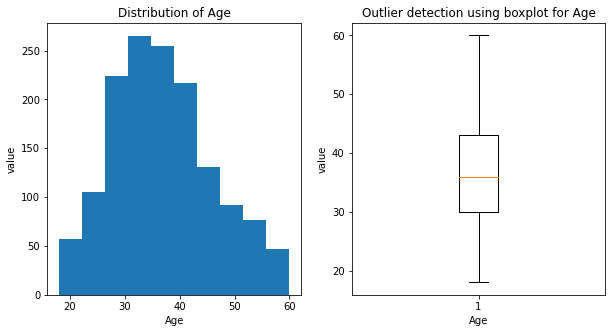

There are no outliers


Analyzing numerical attribute: DailyRate


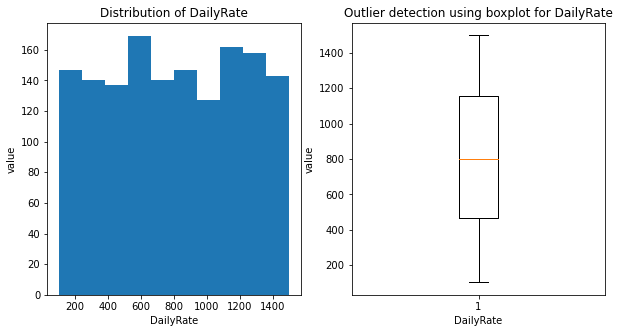

There are no outliers


Analyzing numerical attribute: DistanceFromHome


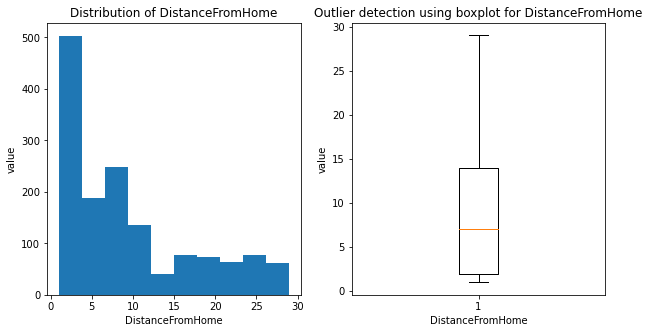

There are no outliers


Analyzing numerical attribute: Education


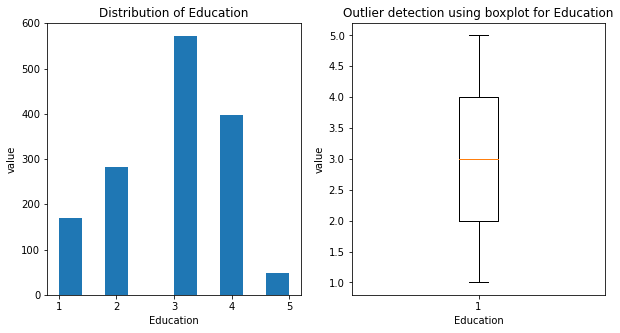

There are no outliers


Analyzing numerical attribute: EmployeeCount


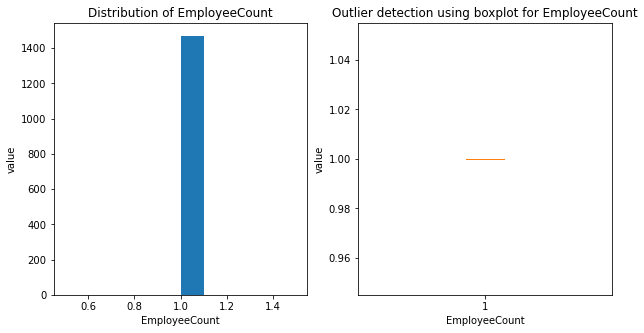

There are no outliers


Analyzing numerical attribute: EmployeeNumber


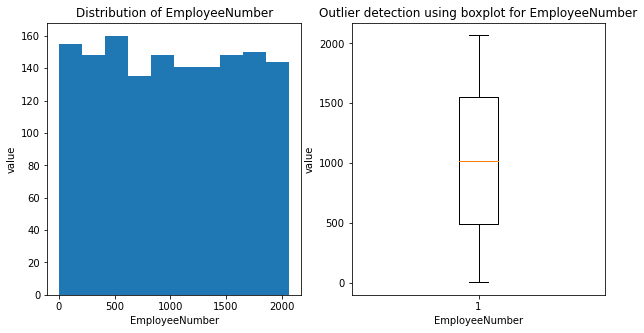

There are no outliers


Analyzing numerical attribute: EnvironmentSatisfaction


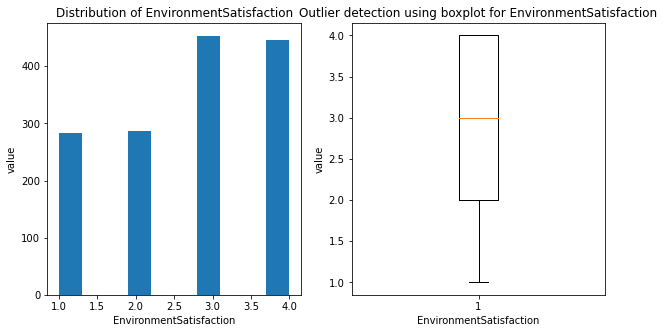

There are no outliers


Analyzing numerical attribute: HourlyRate


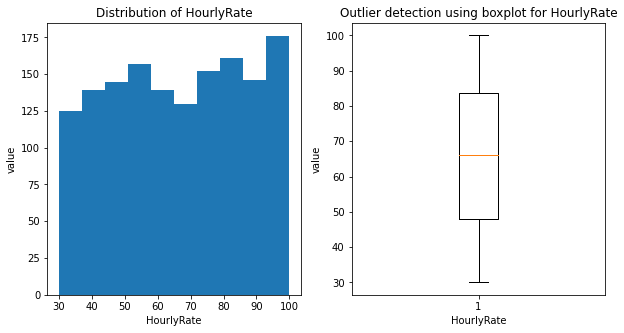

There are no outliers


Analyzing numerical attribute: JobInvolvement


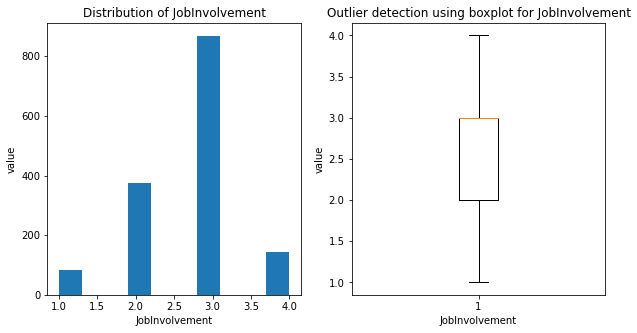

There are no outliers


Analyzing numerical attribute: JobLevel


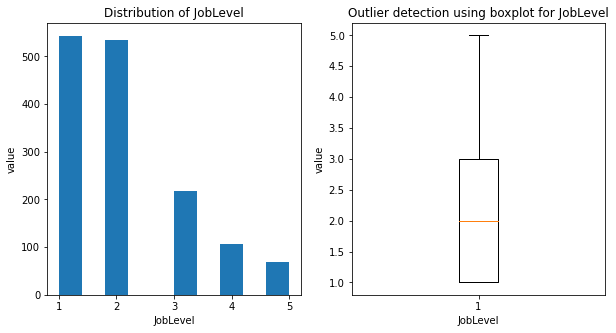

There are no outliers


Analyzing numerical attribute: JobSatisfaction


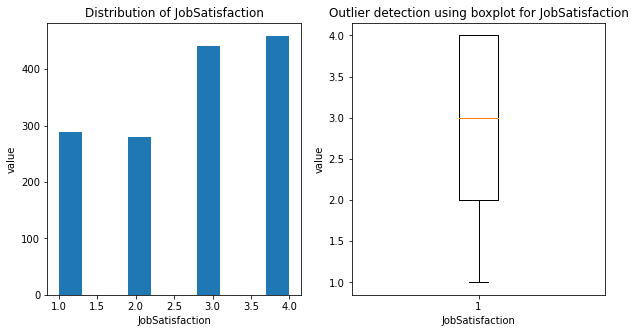

There are no outliers


Analyzing numerical attribute: MonthlyIncome


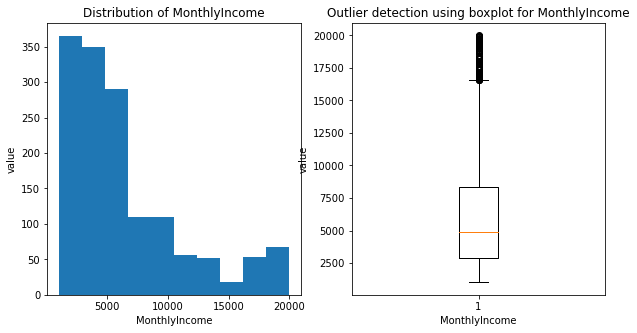

There are outliers in MonthlyIncome


Analyzing numerical attribute: MonthlyRate


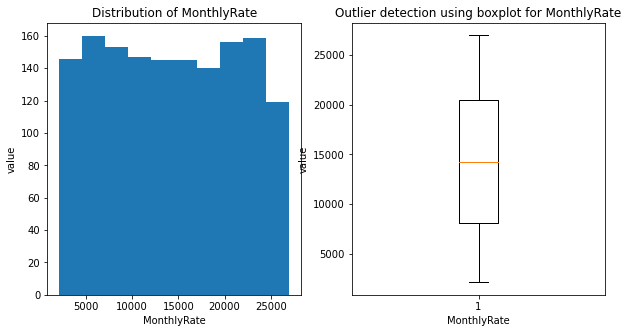

There are no outliers


Analyzing numerical attribute: NumCompaniesWorked


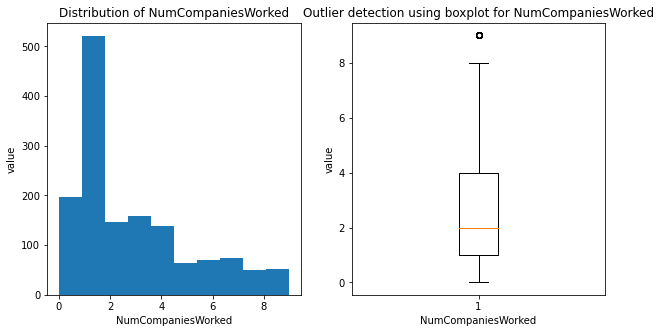

There are outliers in NumCompaniesWorked


Analyzing numerical attribute: PercentSalaryHike


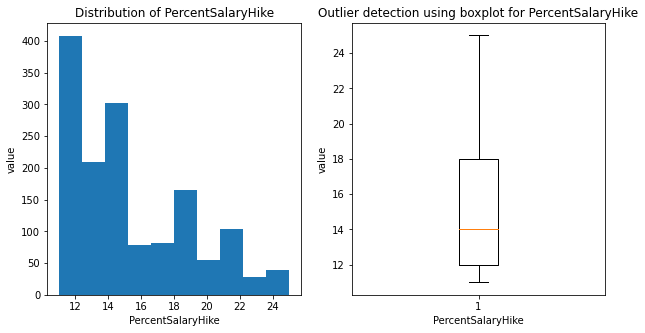

There are no outliers


Analyzing numerical attribute: PerformanceRating


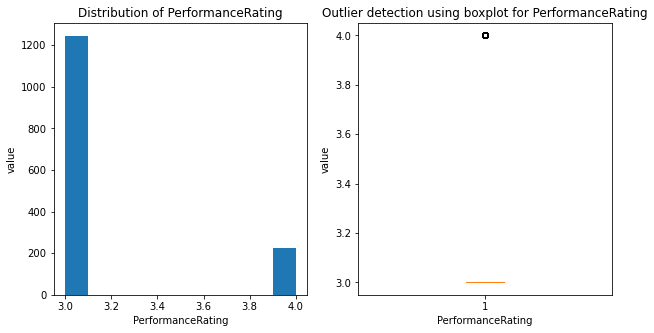

There are outliers in PerformanceRating


Analyzing numerical attribute: RelationshipSatisfaction


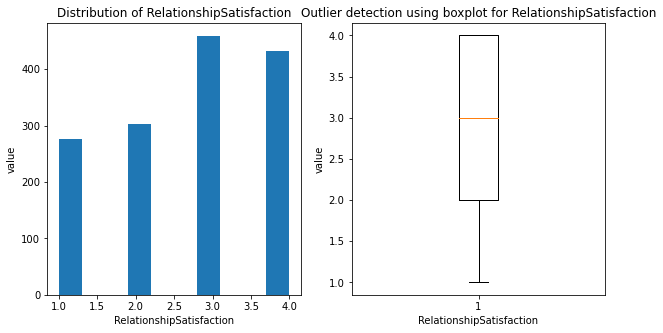

There are no outliers


Analyzing numerical attribute: StandardHours


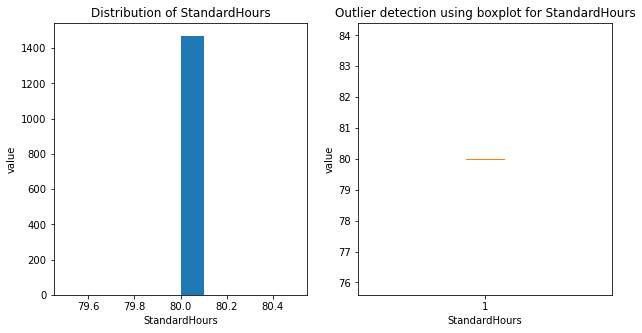

There are no outliers


Analyzing numerical attribute: StockOptionLevel


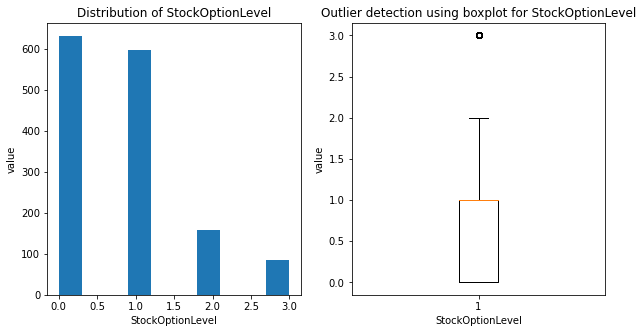

There are outliers in StockOptionLevel


Analyzing numerical attribute: TotalWorkingYears


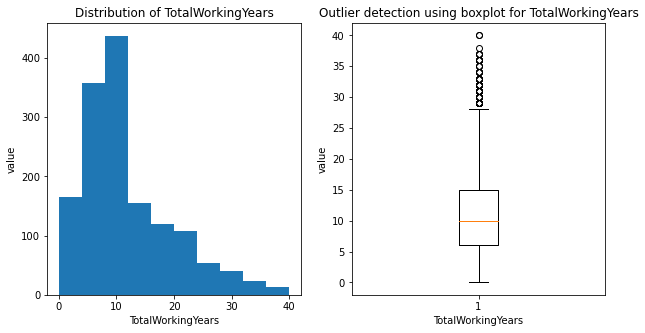

There are outliers in TotalWorkingYears


Analyzing numerical attribute: TrainingTimesLastYear


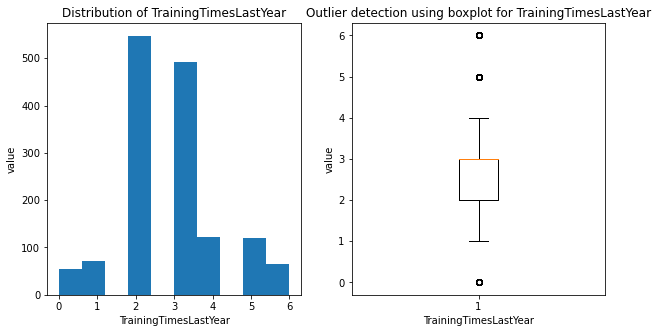

There are outliers in TrainingTimesLastYear


Analyzing numerical attribute: WorkLifeBalance


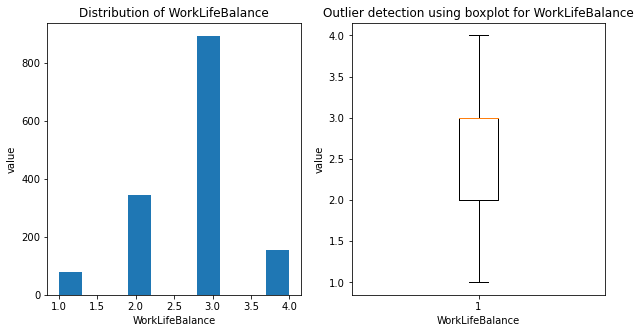

There are no outliers


Analyzing numerical attribute: YearsAtCompany


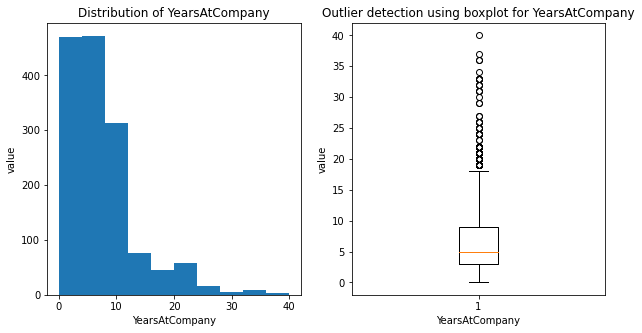

There are outliers in YearsAtCompany


Analyzing numerical attribute: YearsInCurrentRole


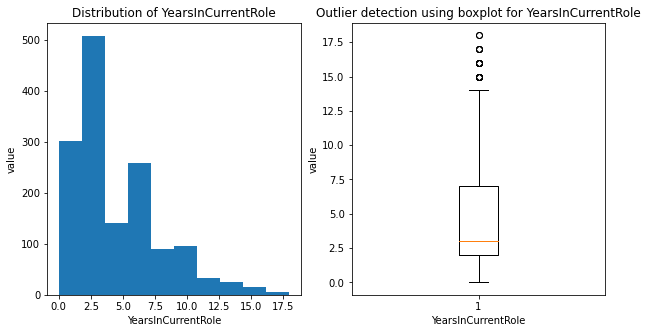

There are outliers in YearsInCurrentRole


Analyzing numerical attribute: YearsSinceLastPromotion


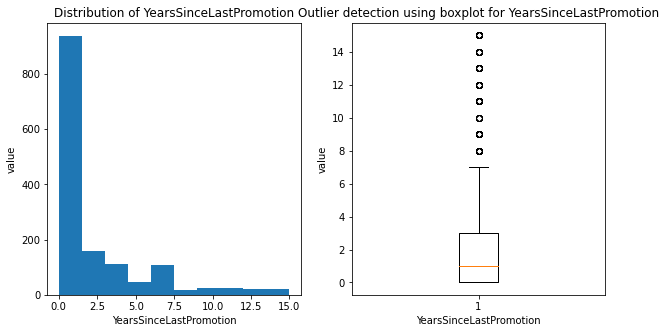

There are outliers in YearsSinceLastPromotion


Analyzing numerical attribute: YearsWithCurrManager


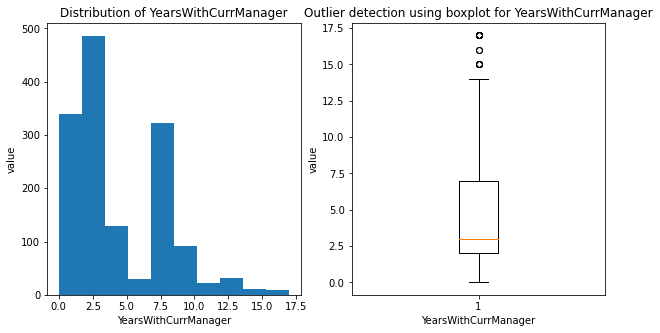

There are outliers in YearsWithCurrManager


In [14]:
for col in num_cols:
    num_plots(df, col=col)

Removing unwanted columns or features that does not add any value like :
Removing features with unique values and ID columns
Removing StandardHours, EmployeeCount as they have only one value
Removing EmployeeNumber as it is an ID field and do not add any value

In [15]:
cols_to_remove = ['StandardHours', 'EmployeeCount', 'EmployeeNumber', 'DailyRate', 'HourlyRate', 'MonthlyRate',
                  'PerformanceRating']
num_cols = list(set(num_cols) - set(cols_to_remove))
df.drop(cols_to_remove, axis=1, inplace=True)
df.shape

(1470, 28)

Function to plot barplot and pie chart for all categorical columns

In [16]:
cat_cols    #describes the categorical columns in the dataset

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [17]:
def cat_plots(df, col='Attrition'):
    """
    This function is used to plot individual graphs for categorical features
    
    Input(s):
    df - dataframe
    col - A categorical feature
    
    Output(s):
    Plot
    """
    try:
        print('\n')
        print('Analyzing categorical attribute: '+col)

        # Get frequency table
        value_counts = df[col].value_counts()
        index = list(value_counts.index)
        value = list(value_counts.values)

        # Plot parameters
        explode_list = [0,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
        colors_list = ['orange', 'lightgreen', 'pink', 'lightblue', 'red']

        # Add plot features and subplot
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        title = 'Distribution of {}'.format(col)
        plt.xlabel(col)
        plt.ylabel('value')
        plt.title(title)
        plt.xticks(rotation=90)
        plt.bar(index, value, color=colors_list[:len(index)], edgecolor='blue') # Bar plot

        # Add plot features and subplot
        plt.subplot(1,2,2)
        title = 'Piechart for {}'.format(col)
        plt.title(title)
        plt.pie(value,
            labels=index,
            colors=colors_list[-len(index):],
            startangle=360,
            shadow= True,
            explode=explode_list[:len(index)],
            autopct='%1.1f%%') # Pie chart
        plt.show()
    
    except Exception as e:
        print("An exception has occured: {}",str(e))
        return   

Visualize all categorical columns
There are a mix of binary variables and multi-level variables. Distribution is not even for any of the categorical feature.



Analyzing categorical attribute: Attrition


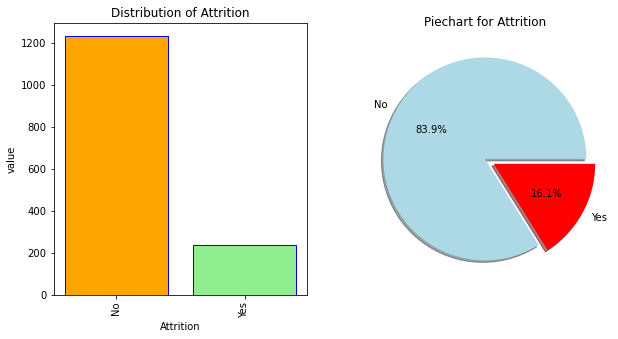



Analyzing categorical attribute: BusinessTravel


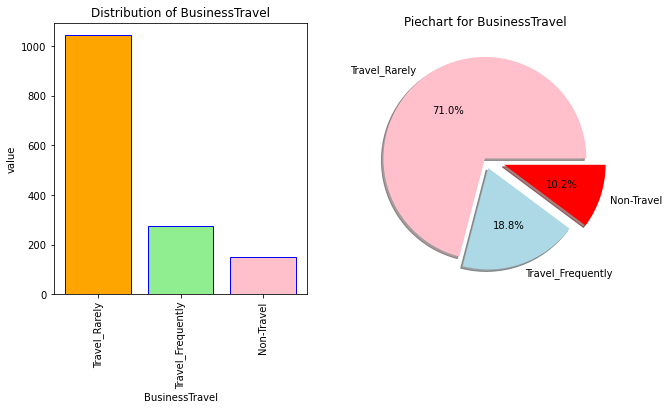



Analyzing categorical attribute: Department


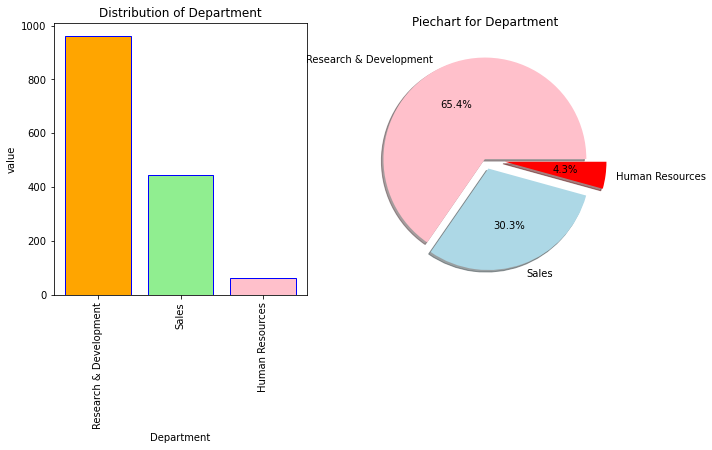



Analyzing categorical attribute: EducationField


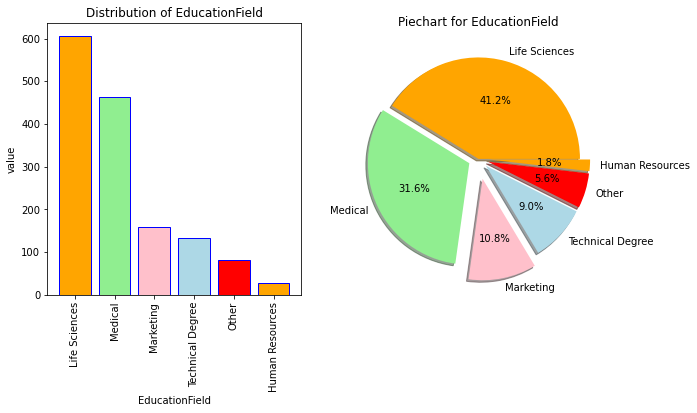



Analyzing categorical attribute: Gender


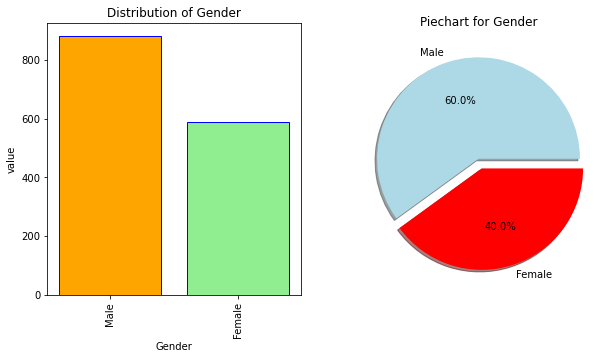



Analyzing categorical attribute: JobRole


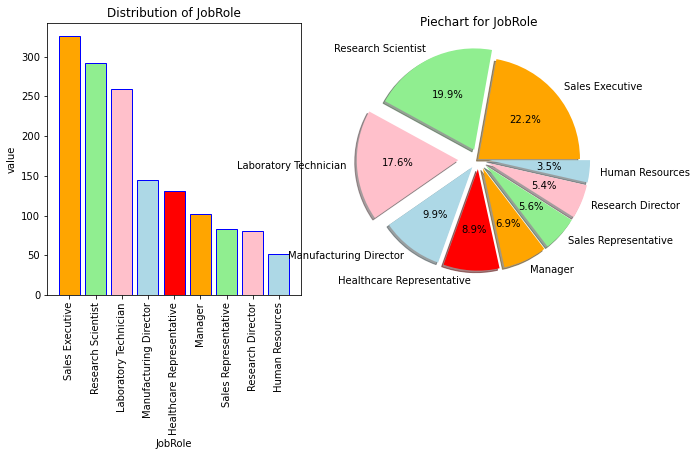



Analyzing categorical attribute: MaritalStatus


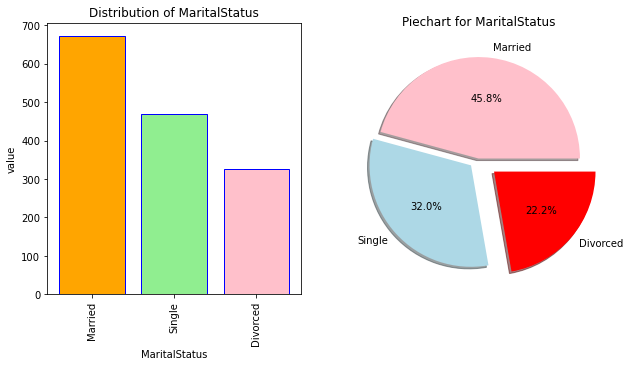



Analyzing categorical attribute: Over18


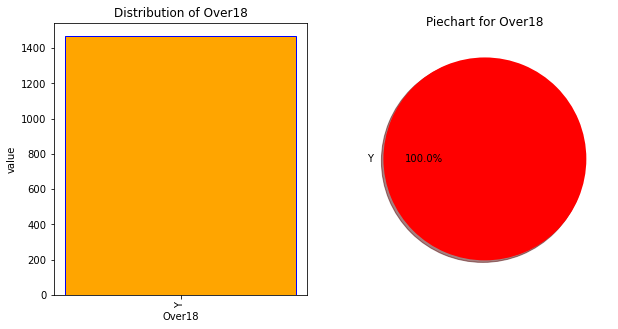



Analyzing categorical attribute: OverTime


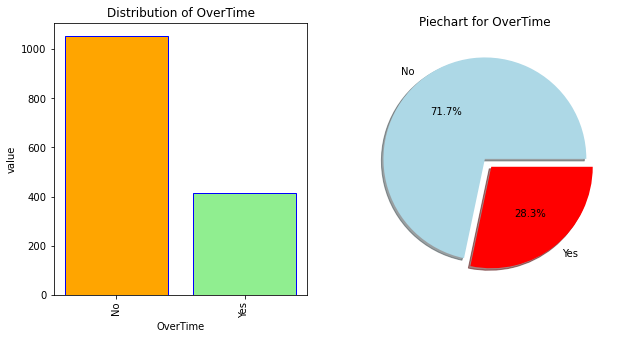

In [18]:
for col in cat_cols:
    cat_plots(df, col=col)

Removing over18 which is a categorical column as there is only one value

In [19]:
df['Over18'].nunique()

1

In [20]:
cols_to_remove = ['Over18']
cat_cols = list(set(cat_cols) - set(cols_to_remove))

df.drop(cols_to_remove, axis=1, inplace=True)
df.shape

(1470, 27)

In [21]:
df.info() #to check for current status of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

1. BQ1 try: Descriptive stats on how attrition affects each feature 

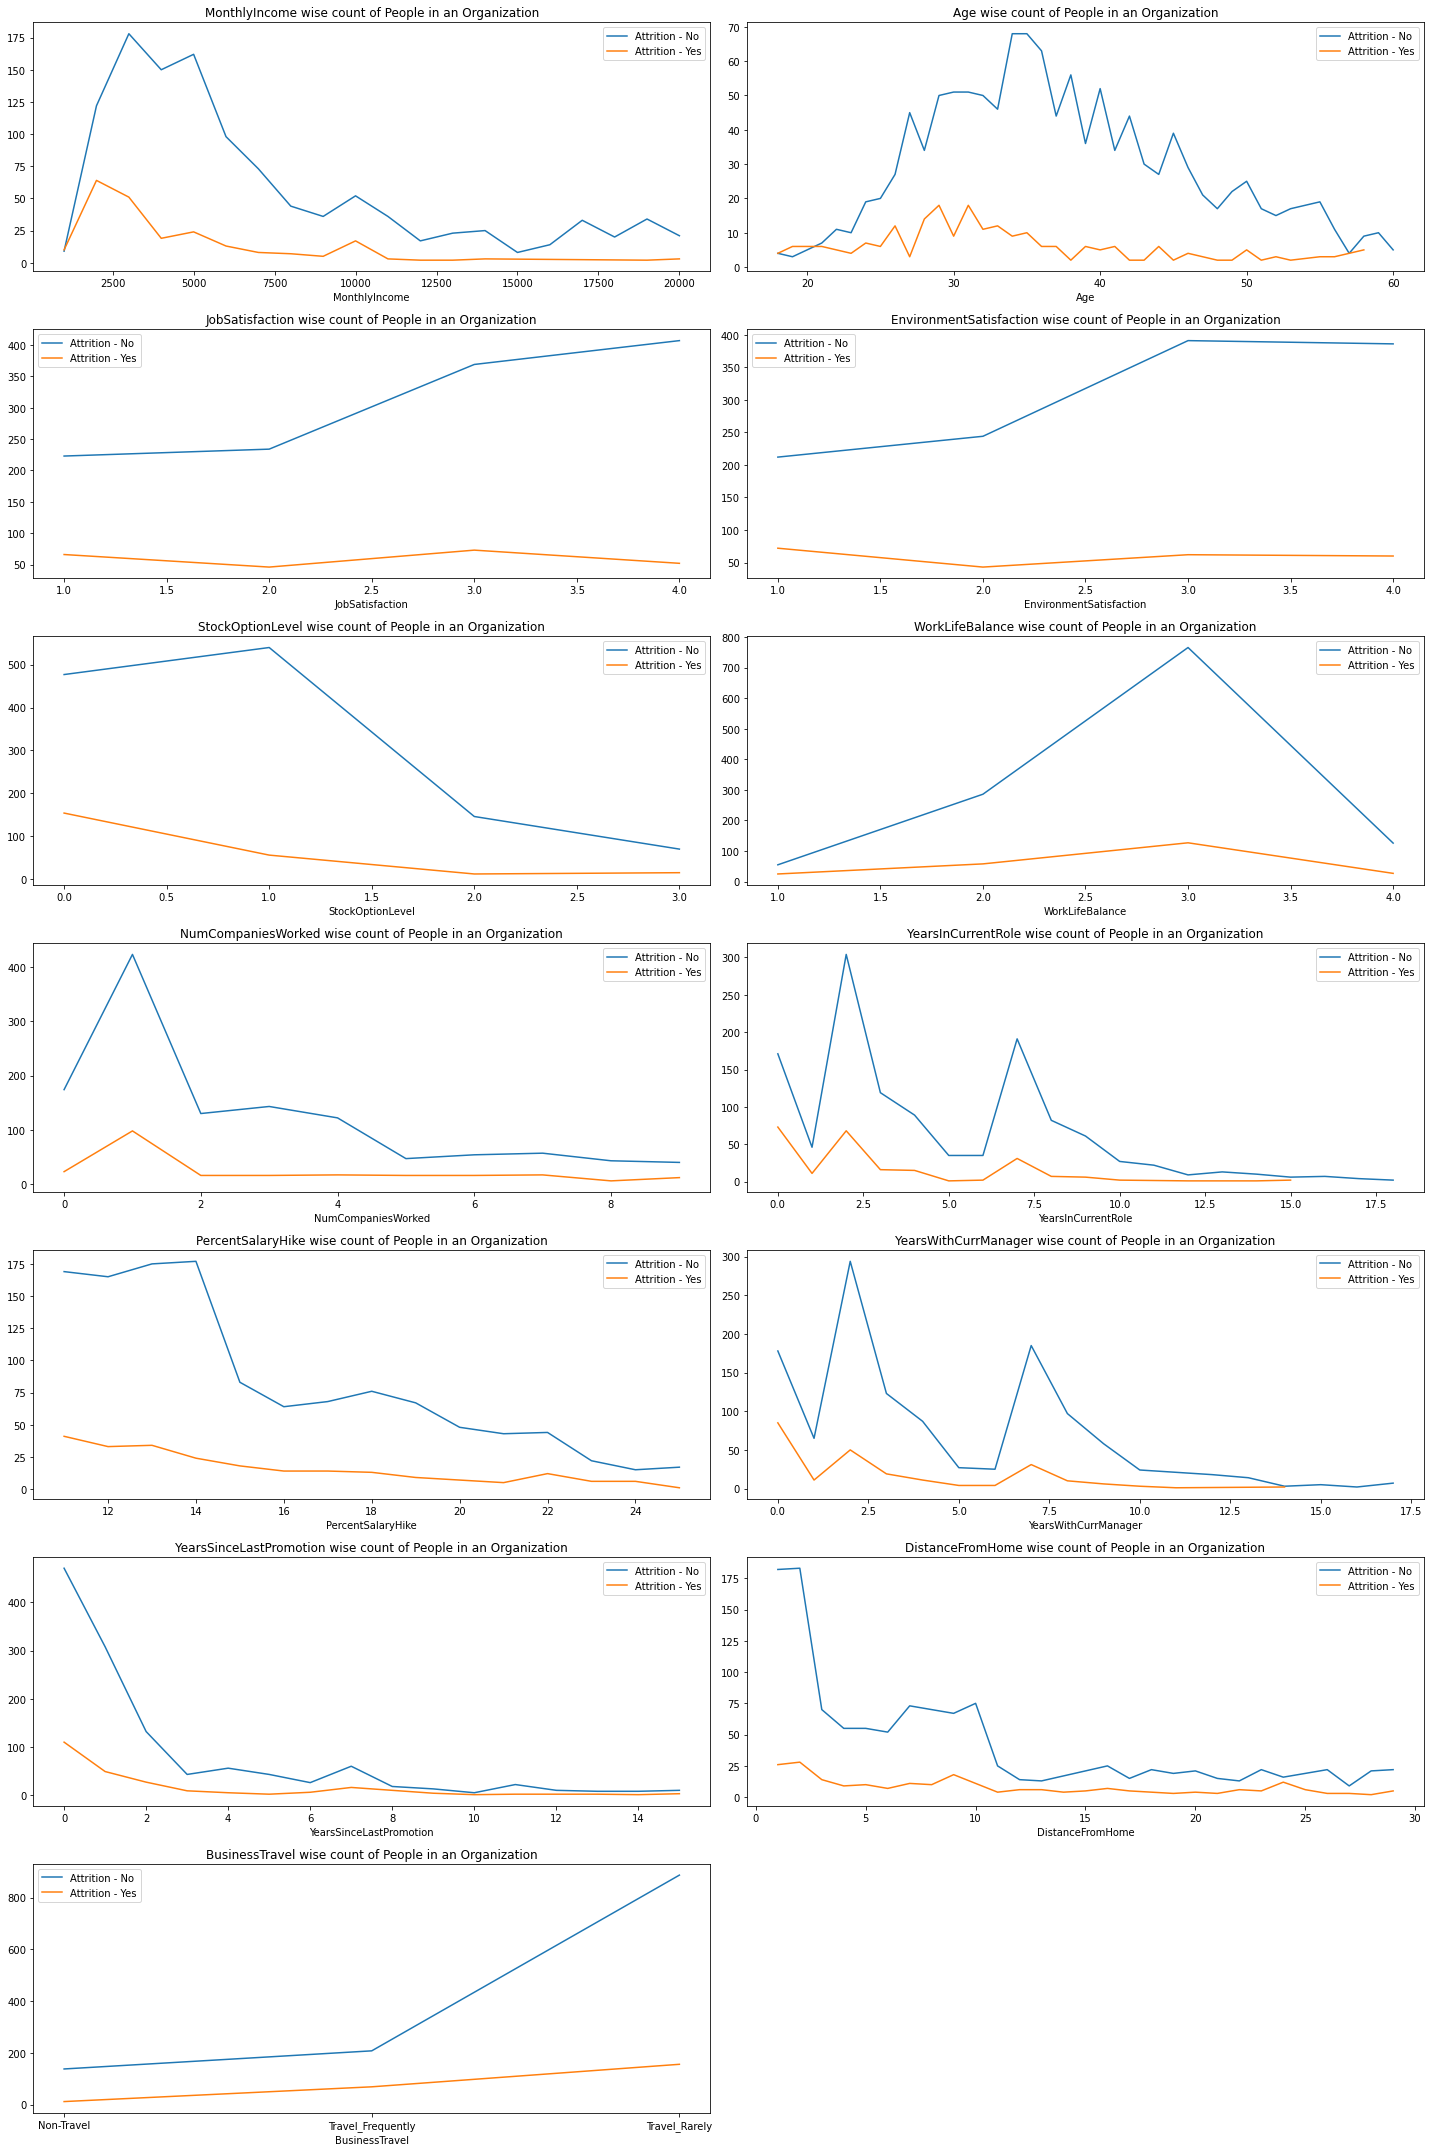

In [22]:
#  Categorical Data
cols_for_plot = ['MonthlyIncome', 'Age', 'JobSatisfaction', 'EnvironmentSatisfaction', 'StockOptionLevel', 
                 'WorkLifeBalance', 'NumCompaniesWorked', 'YearsInCurrentRole', 'PercentSalaryHike', 'YearsWithCurrManager',
                 'YearsSinceLastPromotion', 'DistanceFromHome', 'BusinessTravel']

fig = plt.figure(figsize=(20,30))

c = 1

for col in cols_for_plot:
    if col == 'MonthlyIncome':
        temp_df = df.groupby([col,'Attrition']).apply(lambda x:x[col].count()).reset_index(name='Counts')
        temp_df[col] = round(temp_df['MonthlyIncome'],-3)
        temp_df = temp_df.groupby([col,'Attrition']).apply(lambda x:x[col].count()).reset_index(name='Counts')
        temp_df_1 = temp_df[temp_df['Attrition'] == 'No']
        temp_df_2 = temp_df[temp_df['Attrition'] == 'Yes']
    
    else:
        temp_df = df.groupby([col,'Attrition']).apply(lambda x:x[col].count()).reset_index(name='Counts')
        temp_df_1 = temp_df[temp_df['Attrition'] == 'No']
        temp_df_2 = temp_df[temp_df['Attrition'] == 'Yes']
        
    plt.subplot(7, 2, c)
    plt.title(f'{col} wise count of People in an Organization')
    plt.xlabel(col)
    plt.plot(temp_df_1[col], temp_df_1['Counts'], label='Attrition - No')
    plt.plot(temp_df_2[col], temp_df_2['Counts'], label='Attrition - Yes')
    plt.legend()
        
    c = c + 1

plt.tight_layout()
plt.show()

Data preprocessing Step 1: To find highly correlated features and drop them to reduce bias in the model

Head Map
There are few features which exhibit strong correlation between them. As including them is redundant and adds more bias to the model, these features are identified and dropped from the dataset.

Pearson Correlation

In [23]:
corr_matrix = df[num_cols].corr() # Get correlation matrix
mask = np.triu(np.ones_like(corr_matrix))

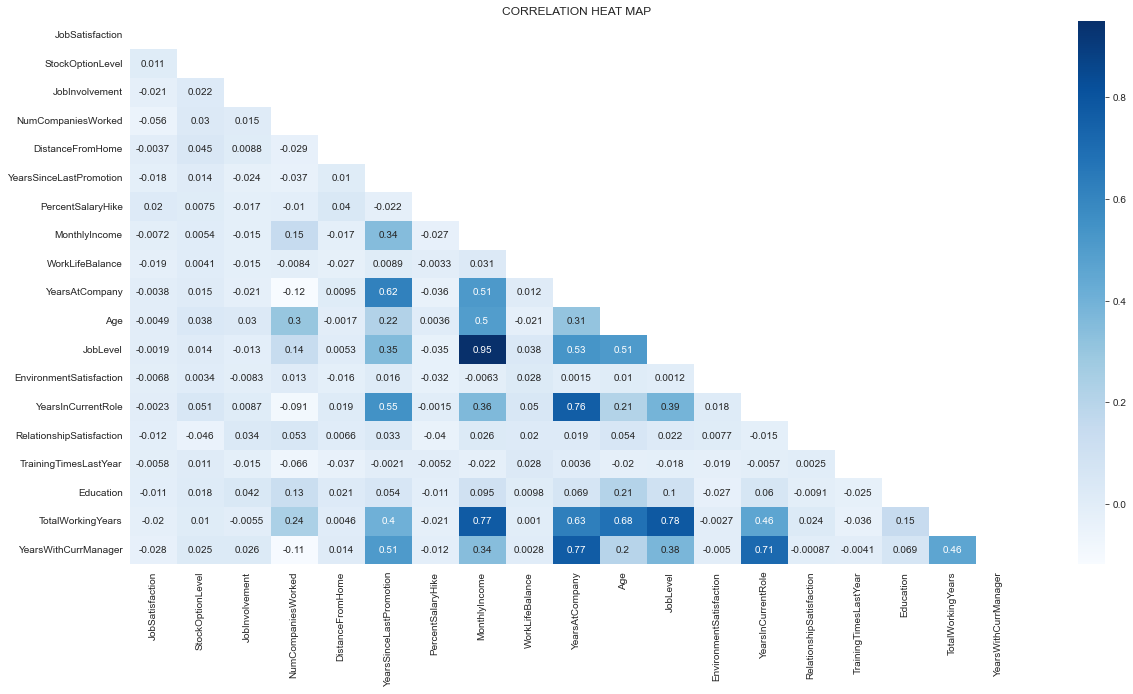

In [24]:
plt.figure(figsize=(20,10))
sns.set_style(style = 'white')
sns.heatmap(corr_matrix, cmap='Blues', annot=True, mask=mask).set(title='CORRELATION HEAT MAP')
plt.show()

Dropping features with high correlation from the initial dataset

In [25]:
cols_to_remove = ['YearsWithCurrManager', 'YearsInCurrentRole', 'PercentSalaryHike', 'TotalWorkingYears', 'JobLevel']
num_cols = list(set(num_cols) - set(cols_to_remove))
df.drop(cols_to_remove, axis=1, inplace=True)

corr_matrix = df[num_cols].corr() # Get correlation matrix
mask = np.triu(np.ones_like(corr_matrix))

In [26]:
binary_cols = [i for i in cat_cols if df[i].nunique() == 2]
cat_cols = list(set(cat_cols) - set(binary_cols))
len(binary_cols), len(cat_cols)

(3, 5)

In [27]:
cat_cols

['BusinessTravel', 'Department', 'MaritalStatus', 'JobRole', 'EducationField']

In [28]:
binary_cols

['OverTime', 'Gender', 'Attrition']

converting categorical features to numeric using Label encoding for dependent variable as it has binary class and 

In [29]:
df[binary_cols] = df[binary_cols].apply(lambda x: LabelEncoder().fit_transform(x))
df[binary_cols].head()

,OverTime,Gender,Attrition
0,1,0,1
1,0,1,0
2,1,1,1
3,1,0,0
4,0,1,0


one-hot encoding

In [30]:
temp_df = pd.get_dummies(df[cat_cols])
temp_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


joining One-Hot encoding variables to original dataframe and drop the original categorical features

In [31]:
df = pd.concat([df, temp_df], axis=1)
df.shape

(1470, 46)

In [32]:
df.drop(cat_cols, axis=1, inplace=True)
df.shape

(1470, 41)

In [33]:
df.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1,1,2,2,0,3,4,5993,8,1,1,0,0,1,6,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,49,0,8,1,3,1,2,2,5130,1,0,4,1,3,3,10,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,37,1,2,2,4,1,2,3,2090,6,1,2,0,3,3,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,33,0,3,4,4,0,3,3,2909,1,1,3,0,3,3,8,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,27,0,2,1,1,1,3,2,3468,9,0,4,1,3,3,2,2,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Train-test split

In [34]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [35]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1176, 40), (1176,), (294, 40), (294,))

Data is imbalance. For the training data, the attrition no/yes ratio is 0.19. Similarly, for the test data, the attrition no/yes ratio is 0.2. The data is similarly spread across training and testing.

In [36]:
Counter(train_y), Counter(test_y)

(Counter({0: 988, 1: 188}), Counter({0: 245, 1: 49}))

Hyper Parameter tuning

In [37]:
def lr_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, train_x_unscaled, val_x_unscaled, test_x_unscaled):
    """
    This function is used to tune hyper parameters for Logistic Regression
    
    Input(s):
    train_x - Independent features of training dataset
    train_y - Dependent feature of training dataset
    val_x - Independent features of validation dataset
    val_y - Dependent feature of validation dataset
    test_x - Independent features of test dataset
    test_y - Dependent feature of test dataset
    train_x_unscaled - Independent features of training dataset without performing feature scaling
    val_x_unscaled - Independent features of validation dataset without performing feature scaling
    test_x_unscaled - Independent features of test dataset without performing feature scaling
    
    Output(s):
    Best hyper parameters for the training data
    """
    # Train logitic regression model 
    results = list()
    for solver in ['lbfgs', 'liblinear', 'saga']:
        for penalty in ['none', 'l1', 'l2', 'elasticnet']:
            for C in [100, 10, 1.0, 0.1, 0.01]:
                try:
                    lr_model = LogisticRegression(solver=solver, penalty=penalty, C=C)
                    lr_model.fit(train_x, train_y)
                    test_preds = lr_model.predict(val_x)
                    results.append([solver, penalty, C, f1_score(val_y, test_preds)*100])
                except Exception:
                    pass
                
    # Get best parameters            
    max_val_list = list()
    for i in results:
        max_val_list.append(i[3])
    max_val = max(max_val_list)
    
    # Return the parameters
    for i in results:
        if max_val == i[3]:
            return i[0], i[1], i[2]

In [38]:
def knn_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, train_x_unscaled, val_x_unscaled, test_x_unscaled):
    """
    This function is used to tune hyper parameters for K Nearest Neighbours
    
    Input(s):
    train_x - Independent features of training dataset
    train_y - Dependent feature of training dataset
    val_x - Independent features of validation dataset
    val_y - Dependent feature of validation dataset
    test_x - Independent features of test dataset
    test_y - Dependent feature of test dataset
    train_x_unscaled - Independent features of training dataset without performing feature scaling
    val_x_unscaled - Independent features of validation dataset without performing feature scaling
    test_x_unscaled - Independent features of test dataset without performing feature scaling
    
    Output(s):
    Best hyper parameters for the training data
    """
    # Train kNN model 
    results = list()
    for n_neighbors in [5,7,9,11,13,15]:
        for weights in ['uniform','distance']:
            for metric in ['minkowski','euclidean','manhattan']:
                try:
                    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
                    knn_model.fit(train_x, train_y)
                    test_preds = knn_model.predict(val_x)
                    results.append([n_neighbors, weights, metric, f1_score(val_y, test_preds)*100])
                except Exception:
                    pass
                
    # Get best parameters            
    max_val_list = list()
    for i in results:
        max_val_list.append(i[3])
    max_val = max(max_val_list)
    
    # Return the parameters
    for i in results:
        if max_val == i[3]:
            return i[0], i[1], i[2]

In [39]:
def svc_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, train_x_unscaled, val_x_unscaled, test_x_unscaled):
    """
    This function is used to tune hyper parameters for SVC Model
    
    Input(s):
    train_x - Independent features of training dataset
    train_y - Dependent feature of training dataset
    val_x - Independent features of validation dataset
    val_y - Dependent feature of validation dataset
    test_x - Independent features of test dataset
    test_y - Dependent feature of test dataset
    train_x_unscaled - Independent features of training dataset without performing feature scaling
    val_x_unscaled - Independent features of validation dataset without performing feature scaling
    test_x_unscaled - Independent features of test dataset without performing feature scaling
    
    Output(s):
    Best hyper parameters for the training data
    """    
    # Train SVC model 
    results = list()    
    for C in [0.1, 1, 10, 100]:
        for gamma in [1, 0.1, 0.01, 0.001, 0.0001]:
            for kernel in ['rbf', 'linear']:
                try:
                    svc_model = SVC(C=C, gamma=gamma, kernel=kernel)
                    svc_model.fit(train_x, train_y)
                    test_preds = svc_model.predict(val_x)
                    results.append([C, gamma, kernel, f1_score(val_y, test_preds)*100])
                except Exception:
                    pass
                
    # Get best parameters            
    max_val_list = list()
    for i in results:
        max_val_list.append(i[3])
    max_val = max(max_val_list)
    
    # Return the parameters
    for i in results:
        if max_val == i[3]:
            return i[0], i[1], i[2]

In [40]:
def rf_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, train_x_unscaled, val_x_unscaled, test_x_unscaled):
    """
    This function is used to tune hyper parameters for Random Forest Classifier
    
    Input(s):
    train_x - Independent features of training dataset
    train_y - Dependent feature of training dataset
    val_x - Independent features of validation dataset
    val_y - Dependent feature of validation dataset
    test_x - Independent features of test dataset
    test_y - Dependent feature of test dataset
    train_x_unscaled - Independent features of training dataset without performing feature scaling
    val_x_unscaled - Independent features of validation dataset without performing feature scaling
    test_x_unscaled - Independent features of test dataset without performing feature scaling
    
    Output(s):
    Best hyper parameters for the training data
    """
    # Train Random Forest model 
    results = list()    
    for max_depth in [10, 20, 30, None]:
        for max_features in ['auto', 'sqrt']:
            for n_estimators in [50, 100, 200, 400, 600, 1000]:
                try:
                    rf_model = RandomForestClassifier(max_depth=max_depth, max_features=max_features, 
                                                      n_estimators=n_estimators)
                    rf_model.fit(train_x_unscaled, train_y)
                    test_preds = rf_model.predict(val_x)
                    results.append([max_depth, max_features, n_estimators, f1_score(val_y, test_preds)*100])
                except Exception:
                    pass
                
    # Get best parameters            
    max_val_list = list()
    for i in results:
        max_val_list.append(i[3])
    max_val = max(max_val_list)
    
    # Return the parameters
    for i in results:
        if max_val == i[3]:
            return i[0], i[1], i[2]

In [41]:
def gnb_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, train_x_unscaled, val_x_unscaled, test_x_unscaled):
    """
    This function is used to tune hyper parameters for Gaussian Naive Bayes
    
    Input(s):
    train_x - Independent features of training dataset
    train_y - Dependent feature of training dataset
    val_x - Independent features of validation dataset
    val_y - Dependent feature of validation dataset
    test_x - Independent features of test dataset
    test_y - Dependent feature of test dataset
    train_x_unscaled - Independent features of training dataset without performing feature scaling
    val_x_unscaled - Independent features of validation dataset without performing feature scaling
    test_x_unscaled - Independent features of test dataset without performing feature scaling
    
    Output(s):
    Best hyper parameters for the training data
    """    
    # Train Gaussian Naive Bayes model 
    results = list()    
    for var_smoothing in [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]:
        try:
            nb_model = GaussianNB(var_smoothing=var_smoothing)
            nb_model.fit(train_x_unscaled, train_y)
            test_preds = nb_model.predict(val_x)
            results.append([var_smoothing, 0, 0, f1_score(val_y, test_preds)*100])
        except Exception as e:
            print(e)
            pass
                
    # Get best parameters            
    max_val_list = list()
    for i in results:
        max_val_list.append(i[3])
    max_val = max(max_val_list)
    
    # Return the parameters
    for i in results:
        if max_val == i[3]:
            return i[0], i[1], i[2]

In [42]:
def xgb_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, train_x_unscaled, val_x_unscaled, test_x_unscaled):
    """
    This function is used to tune hyper parameters for XGBoost
    
    Input(s):
    train_x - Independent features of training dataset
    train_y - Dependent feature of training dataset
    val_x - Independent features of validation dataset
    val_y - Dependent feature of validation dataset
    test_x - Independent features of test dataset
    test_y - Dependent feature of test dataset
    train_x_unscaled - Independent features of training dataset without performing feature scaling
    val_x_unscaled - Independent features of validation dataset without performing feature scaling
    test_x_unscaled - Independent features of test dataset without performing feature scaling
    
    Output(s):
    Best hyper parameters for the training data
    """    
    # Train XGBoost model 
    results = list()    
    for eta in [0.3, 0.1, 0.01, 0.001]:
        for n_estimators in [50, 100, 200, 400, 600, 1000]:
            for booster in ['gbtree', 'gblinear']:
                try:
                    xgb_model = XGBClassifier(eta=eta, n_estimators=n_estimators, booster=booster)
                    xgb_model.fit(train_x_unscaled, train_y)
                    test_preds = xgb_model.predict(val_x)
                    results.append([eta, n_estimators, booster, f1_score(val_y, test_preds)*100])
                except Exception as e:
                    print(e)
                    pass
                
    # Get best parameters            
    max_val_list = list()
    for i in results:
        max_val_list.append(i[3])
    max_val = max(max_val_list)
    
    # Return the parameters
    for i in results:
        if max_val == i[3]:
            return i[0], i[1], i[2]

In [43]:
def score(y_true, y_preds):
    """
    This function is used to calculate various performance evaluation metrics
    
    Input(s):
    y_true - Original values
    y_preds - Predicted values
    
    Output(s):
    Returns a tuple of accuracy, precision, recall, f1 score, auc values
    
    """
    acc = round(accuracy_score(y_true, y_preds)*100,2)
    precision = round(precision_score(y_true, y_preds)*100,2)
    recall = round(recall_score(y_true, y_preds)*100,2)
    f1 = round(f1_score(y_true, y_preds)*100,2)
    auc_score = round(roc_auc_score(y_true, y_preds)*100,2)
    
    print('Accuracy: {} %'.format(acc)) # Accuracy
    print('Precision: {} %'.format(precision)) # Precision
    print('Recall: {} %'.format(recall)) # Recall
    print('F1 Score: {} %'.format(f1)) # F1_score
    print('ROC-AUC Score: {} %'.format(auc_score)) # F1_score
    print('\n')
    
    return acc, precision, recall, f1, auc_score

In [44]:
def all_algorithm_results(train_x, train_y, val_x, val_y, test_x, test_y, 
                          train_x_unscaled=False, val_x_unscaled=False, test_x_unscaled=False, 
                          xgb_cols=False, rf_cols=False):
    
    """
    This function is used to run ML models after identifying best hyper parameters for each model
    
    Input(s):
    train_x - Independent features of training dataset
    train_y - Dependent feature of training dataset
    val_x - Independent features of validation dataset
    val_y - Dependent feature of validation dataset
    test_x - Independent features of test dataset
    test_y - Dependent feature of test dataset
    train_x_unscaled - Independent features of training dataset without performing feature scaling
    val_x_unscaled - Independent features of validation dataset without performing feature scaling
    test_x_unscaled - Independent features of test dataset without performing feature scaling
    
    Output(s):
    Prints and returns the results of Logistic Regression, kNN, SVC, Random Forest, Gaussian Naive Bayes, XGBoost models
    """  
    
    results_list = list()
    
    
    print('---------------------------Logistic Regression-----------------------------')
    s,p,c = lr_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, 
                            train_x_unscaled, val_x_unscaled, test_x_unscaled)
    lr_model = LogisticRegression(solver=s, C=c, penalty=p, random_state=0)
    lr_model.fit(train_x, train_y)

    train_preds = lr_model.predict(train_x)
    val_preds = lr_model.predict(val_x)
    test_preds = lr_model.predict(test_x)

    print('Train data results')
    train_score = score(train_y, train_preds)

    print('Validation data results')
    val_score = score(val_y, val_preds)

    print('Test data results')
    test_score = score(test_y, test_preds)
    
    results_list.append(['Logistic Regression', train_score, val_score, test_score])
    
    print('---------------------------K Nearest Neighbours-----------------------------')
    n,w,m = knn_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, 
                             train_x_unscaled, val_x_unscaled, test_x_unscaled)
    knn_model = KNeighborsClassifier(n_neighbors=n, weights=w, metric=m)
    knn_model.fit(train_x, train_y)

    train_preds = knn_model.predict(train_x)
    val_preds = knn_model.predict(val_x)
    test_preds = knn_model.predict(test_x)

    print('Train data results')
    train_score = score(train_y, train_preds)

    print('Validation data results')
    val_score = score(val_y, val_preds)

    print('Test data results')
    test_score = score(test_y, test_preds)
    
    results_list.append(['K Nearest Neighbours', train_score, val_score, test_score])
    
    print('---------------------------Support Vector Classifier-----------------------------')
    c,g,k = svc_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, 
                             train_x_unscaled, val_x_unscaled, test_x_unscaled)
    svc_model = SVC(C=c, gamma=g, kernel=k, random_state=0)
    svc_model.fit(train_x, train_y)

    train_preds = svc_model.predict(train_x)
    val_preds = svc_model.predict(val_x)
    test_preds = svc_model.predict(test_x)

    print('Train data results')
    train_score = score(train_y, train_preds)

    print('Validation data results')
    val_score = score(val_y, val_preds)

    print('Test data results')
    test_score = score(test_y, test_preds)
    
    results_list.append(['Support Vector Classifier', train_score, val_score, test_score])
    
    print('---------------------------------Random Forest--------------------------------')
    d, f, n = rf_hyper_tuning(train_x[rf_cols], train_y, val_x[rf_cols], val_y, test_x[rf_cols], test_y, 
                             train_x_unscaled[rf_cols], val_x_unscaled[rf_cols], test_x_unscaled[rf_cols])
    rf_model = RandomForestClassifier(max_depth=d, max_features=f, n_estimators=n,  random_state=0)
    rf_model.fit(train_x_unscaled[rf_cols], train_y)

    train_preds = rf_model.predict(train_x_unscaled[rf_cols])
    val_preds = rf_model.predict(val_x_unscaled[rf_cols])
    test_preds = rf_model.predict(test_x_unscaled[rf_cols])

    print('Train data results')
    train_score = score(train_y, train_preds)

    print('Validation data results')
    val_score = score(val_y, val_preds)

    print('Test data results')
    test_score = score(test_y, test_preds)
    
    results_list.append(['Random Forest', train_score, val_score, test_score])

    print('---------------------------Gaussian Naive Bayes-----------------------------')  
    v, _, _ = gnb_hyper_tuning(train_x, train_y, val_x, val_y, test_x, test_y, 
                             train_x_unscaled, val_x_unscaled, test_x_unscaled)

    nb_model = GaussianNB(var_smoothing=v)
    nb_model.fit(train_x_unscaled, train_y)

    train_preds = nb_model.predict(train_x_unscaled)
    val_preds = nb_model.predict(val_x_unscaled)
    test_preds = nb_model.predict(test_x_unscaled)

    print('Train data results')
    train_score = score(train_y, train_preds)

    print('Validation data results')
    val_score = score(val_y, val_preds)

    print('Test data results')
    test_score = score(test_y, test_preds)
    
    results_list.append(['Gaussian Naive Bayes', train_score, val_score, test_score])

    print('---------------------------XGBoost-----------------------------')
    e, n, b = xgb_hyper_tuning(train_x[xgb_cols], train_y, val_x[xgb_cols], val_y, test_x[xgb_cols], test_y, 
                         train_x_unscaled[xgb_cols], val_x_unscaled[xgb_cols], test_x_unscaled[xgb_cols])
    xgb_model = XGBClassifier(eta=e, n_estimators=n, booster=b, random_state=0)
    xgb_model.fit(train_x_unscaled[xgb_cols], train_y)

    train_preds = xgb_model.predict(train_x_unscaled[xgb_cols])
    val_preds = xgb_model.predict(val_x_unscaled[xgb_cols])
    test_preds = xgb_model.predict(test_x_unscaled[xgb_cols])

    print('Train data results')
    train_score = score(train_y, train_preds)

    print('Validation data results')
    val_score = score(val_y, val_preds)

    print('Test data results')
    test_score = score(test_y, test_preds)
    
    results_list.append(['XGBoost', train_score, val_score, test_score]) 
    
    return results_list

In [45]:
def plot_results(df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC-AUC']

    plt.figure(figsize=(20,12))
    for i in range(len(metrics)):
        plt.subplot(2,3,i+1)
        sns.barplot(df['Model Name'], df[metrics[i]])
        x = plt.title(metrics[i])
        x = plt.xticks(rotation=89)
        plt.xlabel(None)
        plt.ylim(0,100)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.99)

Train-Validation Split

In [46]:
X_orig_train, X_orig_val, y_orig_train, y_orig_val = train_test_split(train_x, train_y, test_size=0.2, random_state=0)
X_orig_train.shape, X_orig_val.shape, y_orig_train.shape, y_orig_val.shape

((940, 40), (236, 40), (940,), (236,))

In [47]:
X_orig_train_scaled = X_orig_train.copy()
X_orig_val_scaled = X_orig_val.copy()
test_scaled = test_x.copy()

for col in num_cols:
    mms = MinMaxScaler()
    mms.fit(X_orig_train_scaled[[col]])
    X_orig_train_scaled[col] = mms.transform(X_orig_train_scaled[[col]])
    X_orig_val_scaled[col] = mms.transform(X_orig_val_scaled[[col]])
    test_scaled[col] = mms.transform(test_x[[col]])

feature selection using xgboost

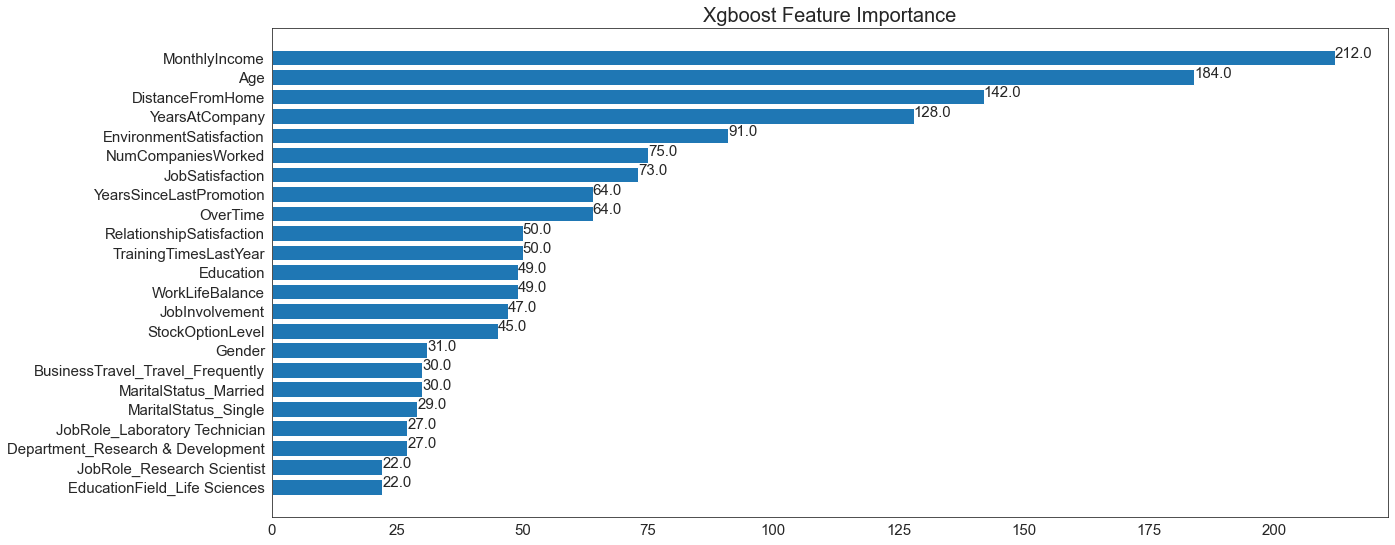

In [48]:
model = XGBClassifier(random_state=0)
model.fit(X_orig_train, y_orig_train)

feature_important = model.get_booster().get_score(importance_type='weight')
index = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=index, columns=["score"]).sort_values(by = "score", ascending=True)
data = data[data['score'] > 20]
xgb_cols = list(data.index)

font = {
    'size'   : 15
}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,9))
plt.barh(data.index, data['score'])
plt.title("Xgboost Feature Importance", fontsize=20)

values = list(data.score)
for i in range(len(xgb_cols)):
    plt.text(values[i], xgb_cols[i], str(values[i]))

feature selection using random forest

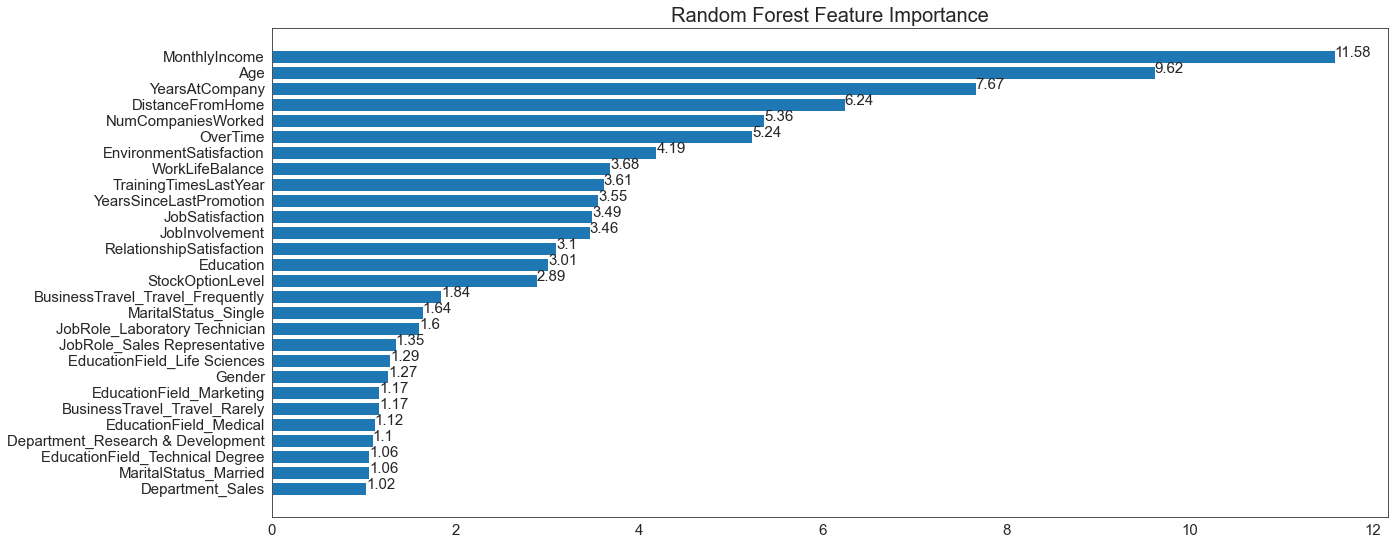

In [49]:
model = RandomForestClassifier(random_state=0)
model.fit(X_orig_train, y_orig_train)

values = model.feature_importances_ * 100
index = list(X_orig_train.columns)

data = pd.DataFrame(data=values, index=index, columns=["score"]).sort_values(by = "score", ascending=True)
data = data[data['score'] > 1]
rf_cols = list(data.index)

font = {
    'size'   : 15
}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,9))
plt.barh(data.index, data['score'])
plt.title("Random Forest Feature Importance", fontsize=20)

values = list(data.score)
for i in range(len(rf_cols)):
    plt.text(values[i], rf_cols[i], str(round(values[i], 2)))

In [50]:
results_orig = all_algorithm_results(X_orig_train_scaled, y_orig_train, X_orig_val_scaled, y_orig_val, test_scaled, test_y, 
                     X_orig_train, X_orig_val, test_x, xgb_cols, rf_cols)

---------------------------Logistic Regression-----------------------------
Train data results
Accuracy: 89.04 %
Precision: 79.31 %
Recall: 44.81 %
F1 Score: 57.26 %
ROC-AUC Score: 71.26 %


Validation data results
Accuracy: 85.59 %
Precision: 50.0 %
Recall: 44.12 %
F1 Score: 46.88 %
ROC-AUC Score: 68.35 %


Test data results
Accuracy: 86.39 %
Precision: 62.86 %
Recall: 44.9 %
F1 Score: 52.38 %
ROC-AUC Score: 69.8 %


---------------------------K Nearest Neighbours-----------------------------
Train data results
Accuracy: 86.81 %
Precision: 78.85 %
Recall: 26.62 %
F1 Score: 39.81 %
ROC-AUC Score: 62.61 %


Validation data results
Accuracy: 87.29 %
Precision: 61.11 %
Recall: 32.35 %
F1 Score: 42.31 %
ROC-AUC Score: 64.44 %


Test data results
Accuracy: 85.71 %
Precision: 76.92 %
Recall: 20.41 %
F1 Score: 32.26 %
ROC-AUC Score: 59.59 %


---------------------------Support Vector Classifier-----------------------------
Train data results
Accuracy: 88.62 %
Precision: 80.52 %
Recall: 40.26 

In [51]:
df_original_data = pd.DataFrame(results_orig, columns=['Model Name', 'Train Data', 'Validation Data', 'Test Data'])
df_original_data[['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC-AUC']] = pd.DataFrame(df_original_data['Test Data'].to_list())
df_original_data.drop(['Train Data', 'Validation Data', 'Test Data'], axis=1, inplace=True)

In [52]:
df_original_data

,Model Name,Accuracy,Precision,Recall,F1_Score,ROC-AUC
0,Logistic Regression,86.39,62.86,44.90,52.38,69.80
1,K Nearest Neighbours,85.71,76.92,20.41,32.26,59.59
2,Support Vector Classifier,87.76,70.97,44.90,55.00,70.61
3,Random Forest,85.37,75.00,18.37,29.51,58.57
4,Gaussian Naive Bayes,77.21,37.84,57.14,45.53,69.18
5,XGBoost,84.01,75.00,6.12,11.32,52.86


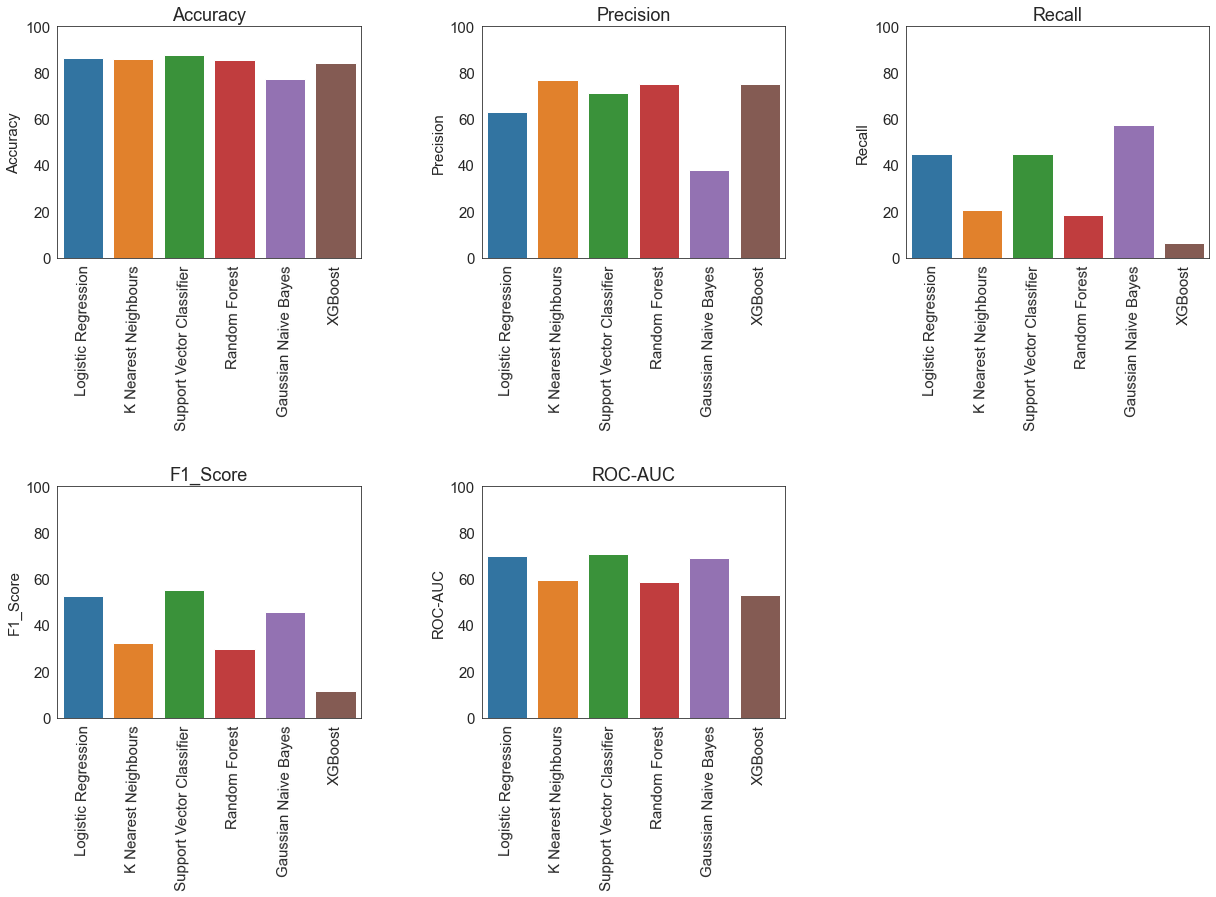

In [53]:
plot_results(df_original_data)

Random Over Sampling

In [54]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_ros, y_ros = oversample.fit_resample(train_x, train_y)
print(Counter(y_ros), Counter(train_y))

Counter({0: 988, 1: 988}) Counter({0: 988, 1: 188})


In [55]:
X_ros_train, X_ros_val, y_ros_train, y_ros_val = train_test_split(X_ros, y_ros, test_size=0.2, random_state=0)
X_ros_train.shape, X_ros_val.shape, y_ros_train.shape, y_ros_val.shape

((1580, 40), (396, 40), (1580,), (396,))

In [56]:
X_ros_train_scaled = X_ros_train.copy()
X_ros_val_scaled = X_ros_val.copy()
test_scaled = test_x.copy()

for col in num_cols:
    mms = MinMaxScaler()
    mms.fit(X_ros_train[[col]])
    X_ros_train_scaled[col] = mms.transform(X_ros_train[[col]])
    X_ros_val_scaled[col] = mms.transform(X_ros_val[[col]])
    test_scaled[col] = mms.transform(test_x[[col]])

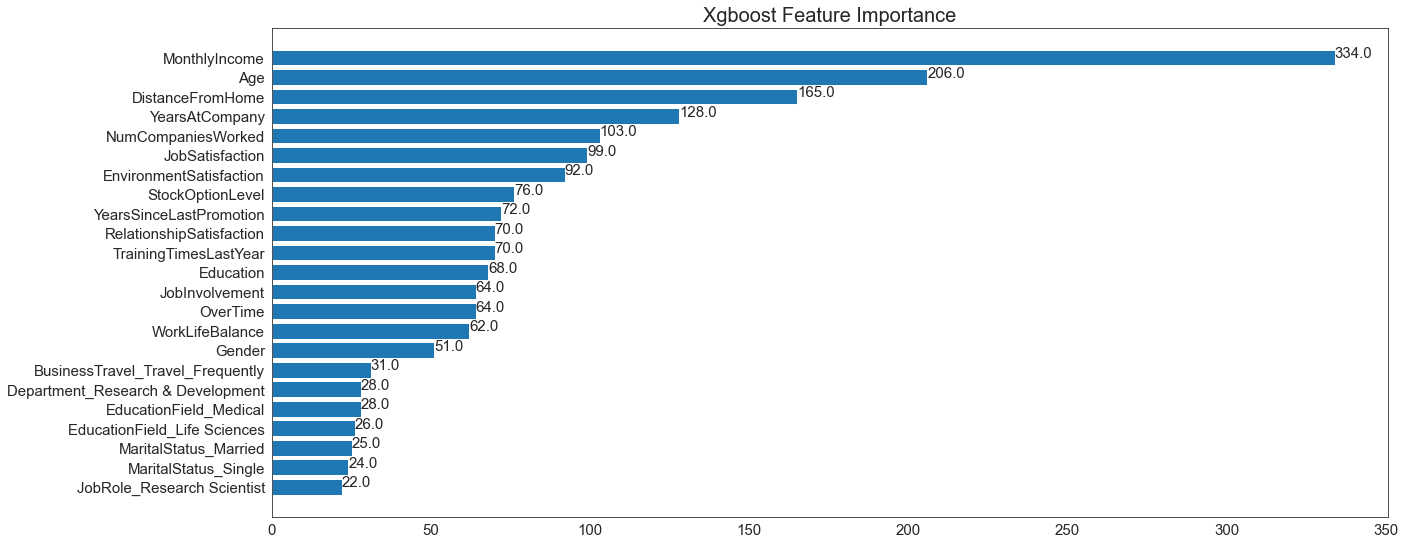

In [57]:
model = XGBClassifier(random_state=0)
model.fit(X_ros_train, y_ros_train)

feature_important = model.get_booster().get_score(importance_type='weight')
index = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=index, columns=["score"]).sort_values(by = "score", ascending=True)
data = data[data['score'] > 20]
xgb_cols = list(data.index)

font = {
    'size'   : 15
}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,9))
plt.barh(data.index, data['score'])
plt.title("Xgboost Feature Importance", fontsize=20)

values = list(data.score)
for i in range(len(xgb_cols)):
    plt.text(values[i], xgb_cols[i], str(round(values[i], 2)))

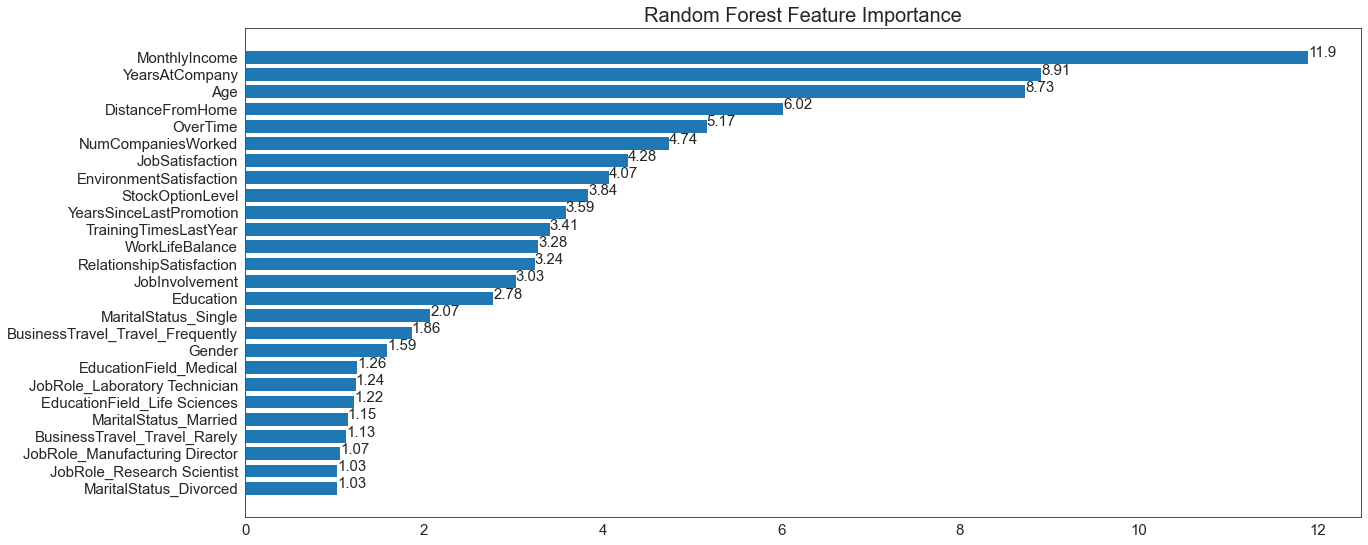

In [58]:
model = RandomForestClassifier(random_state=0)
model.fit(X_ros_train, y_ros_train)

values = model.feature_importances_ * 100
index = list(X_ros_train.columns)

data = pd.DataFrame(data=values, index=index, columns=["score"]).sort_values(by = "score", ascending=True)
data = data[data['score'] > 1]
rf_cols = list(data.index)

font = {
    'size'   : 15
}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,9))
plt.barh(data.index, data['score'])
plt.title("Random Forest Feature Importance", fontsize=20)

values = list(data.score)
for i in range(len(rf_cols)):
    plt.text(values[i], rf_cols[i], str(round(values[i], 2)))

In [59]:
results_ros_data = all_algorithm_results(X_ros_train_scaled, y_ros_train, X_ros_val_scaled, y_ros_val, test_scaled, test_y, 
                     X_ros_train, X_ros_val, test_x, xgb_cols, rf_cols)

---------------------------Logistic Regression-----------------------------
Train data results
Accuracy: 75.82 %
Precision: 76.6 %
Recall: 75.06 %
F1 Score: 75.82 %
ROC-AUC Score: 75.83 %


Validation data results
Accuracy: 78.28 %
Precision: 78.26 %
Recall: 75.79 %
F1 Score: 77.01 %
ROC-AUC Score: 78.19 %


Test data results
Accuracy: 78.23 %
Precision: 41.94 %
Recall: 79.59 %
F1 Score: 54.93 %
ROC-AUC Score: 78.78 %


---------------------------K Nearest Neighbours-----------------------------
Train data results
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %
ROC-AUC Score: 100.0 %


Validation data results
Accuracy: 88.38 %
Precision: 80.51 %
Recall: 100.0 %
F1 Score: 89.2 %
ROC-AUC Score: 88.83 %


Test data results
Accuracy: 70.75 %
Precision: 30.11 %
Recall: 57.14 %
F1 Score: 39.44 %
ROC-AUC Score: 65.31 %


---------------------------Support Vector Classifier-----------------------------
Train data results
Accuracy: 76.71 %
Precision: 78.22 %
Recall: 74.69

In [60]:
df_ros_data = pd.DataFrame(results_ros_data, columns=['Model Name', 'Train Data', 'Validation Data', 'Test Data'])
df_ros_data[['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC-AUC']] = pd.DataFrame(df_ros_data['Test Data'].to_list())
df_ros_data.drop(['Train Data', 'Validation Data', 'Test Data'], axis=1, inplace=True)

In [61]:
df_ros_data

,Model Name,Accuracy,Precision,Recall,F1_Score,ROC-AUC
0,Logistic Regression,78.23,41.94,79.59,54.93,78.78
1,K Nearest Neighbours,70.75,30.11,57.14,39.44,65.31
2,Support Vector Classifier,79.59,43.68,77.55,55.88,78.78
3,Random Forest,84.01,53.85,28.57,37.33,61.84
4,Gaussian Naive Bayes,63.27,28.47,79.59,41.94,69.80
5,XGBoost,76.87,38.27,63.27,47.69,71.43


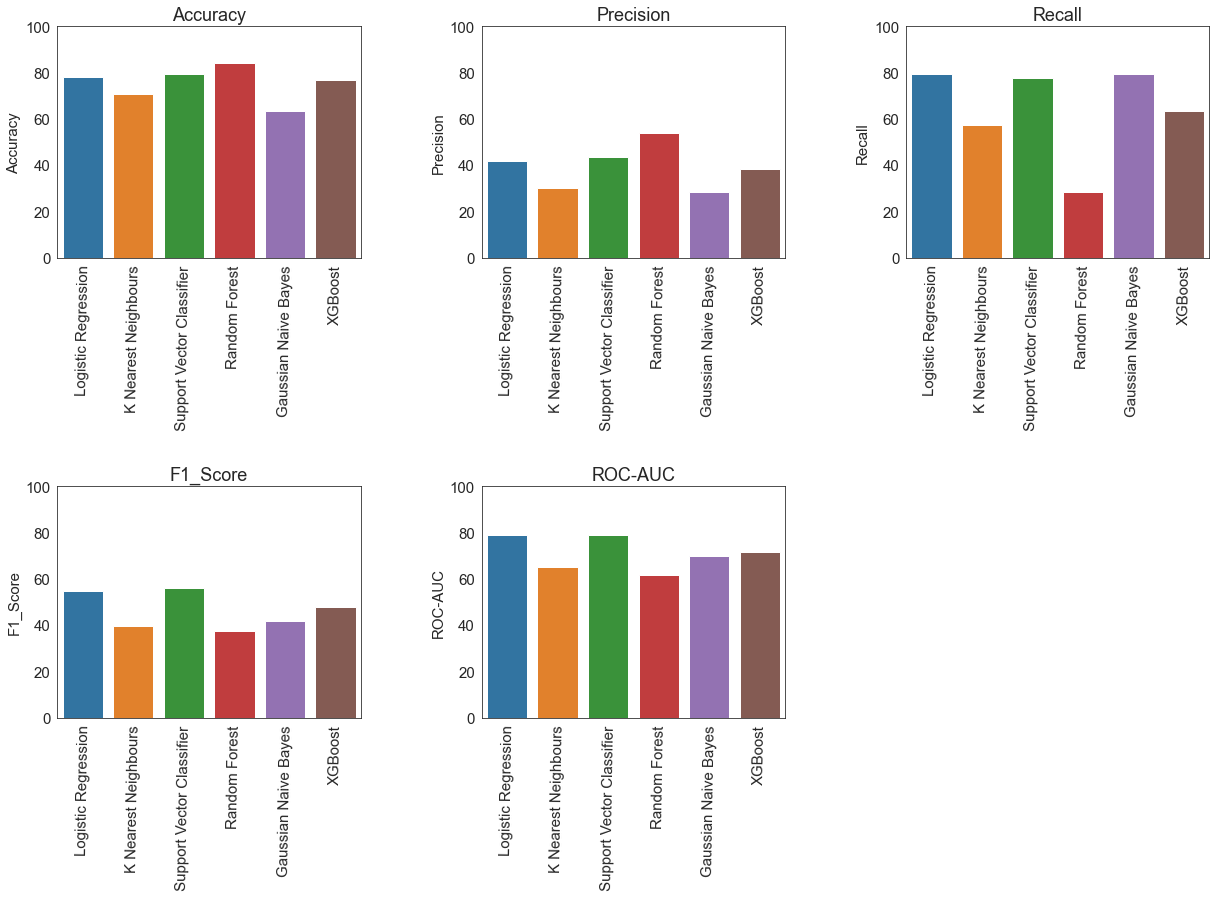

In [62]:
plot_results(df_ros_data)

SMOTE

In [63]:
smote = SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(train_x, train_y)
print(Counter(y_smote), Counter(train_y))

Counter({0: 988, 1: 988}) Counter({0: 988, 1: 188})


In [64]:
X_smote_train, X_smote_val, y_smote_train, y_smote_val = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)
X_smote_train.shape, X_smote_val.shape, y_smote_train.shape, y_smote_val.shape

((1580, 40), (396, 40), (1580,), (396,))

In [65]:
X_smote_train_scaled = X_smote_train.copy()
X_smote_val_scaled = X_smote_val.copy()
test_scaled = test_x.copy()

for col in num_cols:
    mms = MinMaxScaler()
    mms.fit(X_smote_train[[col]])
    X_smote_train_scaled[col] = mms.transform(X_smote_train[[col]])
    X_smote_val_scaled[col] = mms.transform(X_smote_val[[col]])
    test_scaled[col] = mms.transform(test_x[[col]])

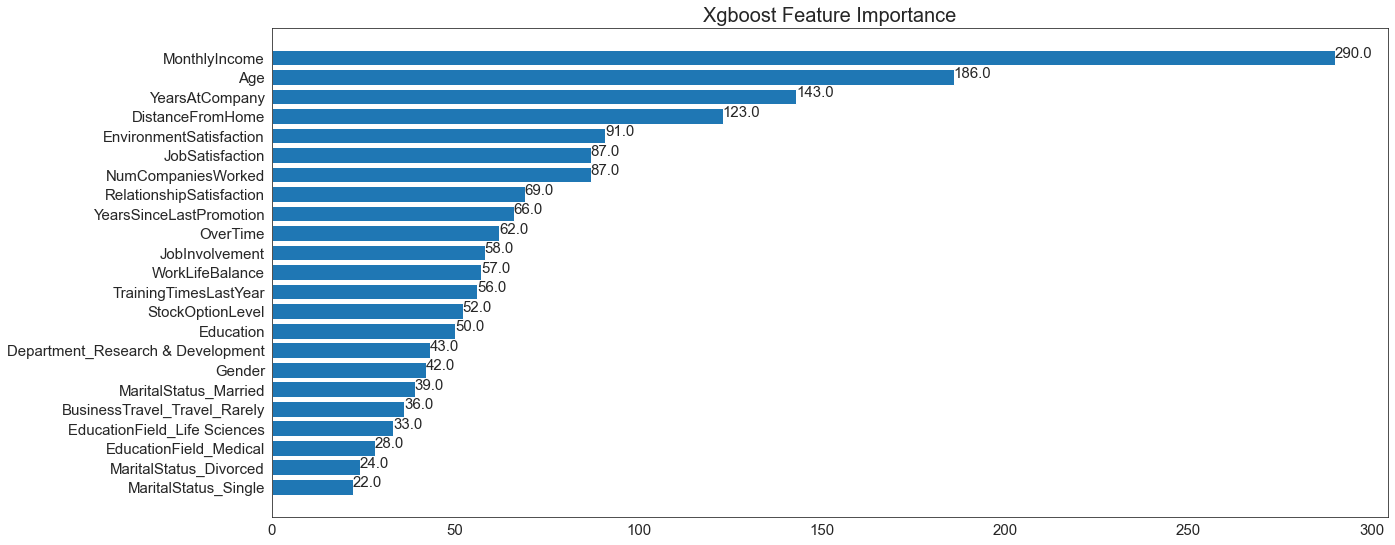

In [66]:
model = XGBClassifier(random_state=0)
model.fit(X_smote_train, y_smote_train)

feature_important = model.get_booster().get_score(importance_type='weight')
index = list(feature_important.keys())
values = list(feature_important.values())


data = pd.DataFrame(data=values, index=index, columns=["score"]).sort_values(by = "score", ascending=True)
data = data[data['score'] > 20]
xgb_cols = list(data.index)

font = {
    'size'   : 15
}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,9))
plt.barh(data.index, data['score'])
plt.title("Xgboost Feature Importance", fontsize=20)

values = list(data.score)
for i in range(len(xgb_cols)):
    plt.text(values[i], xgb_cols[i], str(values[i]))

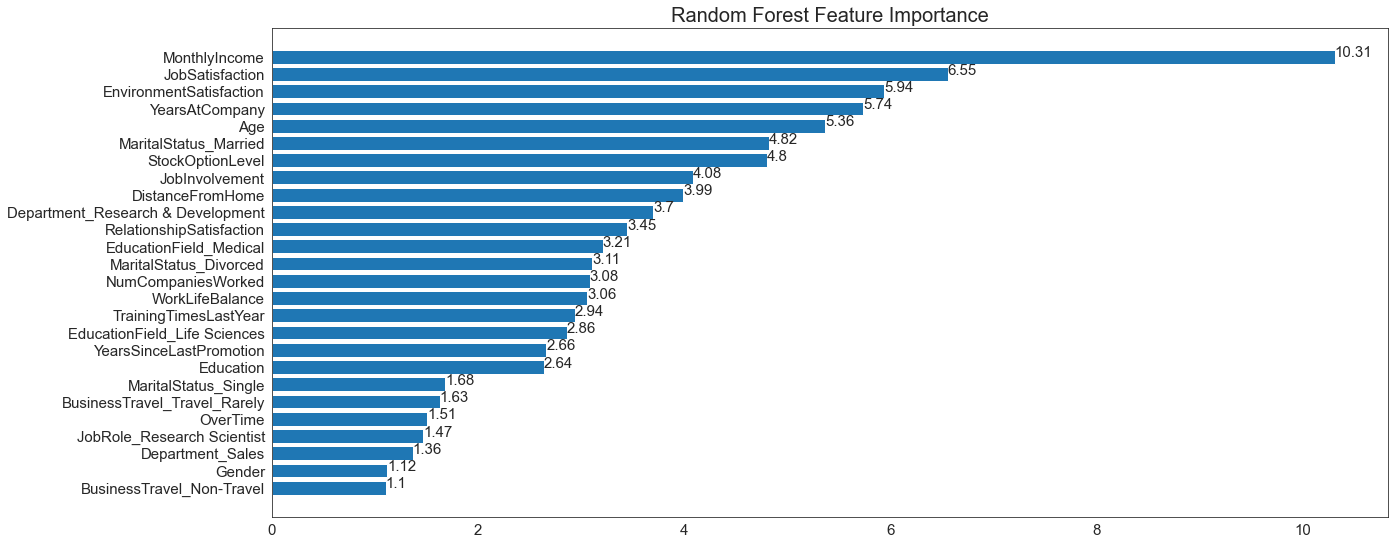

In [67]:
model = RandomForestClassifier(random_state=0)
model.fit(X_smote_train, y_smote_train)

values = model.feature_importances_ * 100
index = list(X_smote_train.columns)

data = pd.DataFrame(data=values, index=index, columns=["score"]).sort_values(by = "score", ascending=True)
data = data[data['score'] > 1]
rf_cols = list(data.index)

font = {
    'size'   : 15
}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,9))
plt.barh(data.index, data['score'])
plt.title("Random Forest Feature Importance", fontsize=20)

values = list(data.score)
for i in range(len(rf_cols)):
    plt.text(values[i], rf_cols[i], str(round(values[i], 2)))

In [68]:
results_smote = all_algorithm_results(X_smote_train_scaled, y_smote_train, X_smote_val_scaled, y_smote_val, 
                                      test_scaled, test_y, X_smote_train, X_smote_val, test_x, xgb_cols, rf_cols)

---------------------------Logistic Regression-----------------------------
Train data results
Accuracy: 92.59 %
Precision: 97.1 %
Recall: 87.97 %
F1 Score: 92.31 %
ROC-AUC Score: 92.64 %


Validation data results
Accuracy: 92.17 %
Precision: 95.95 %
Recall: 87.37 %
F1 Score: 91.46 %
ROC-AUC Score: 91.99 %


Test data results
Accuracy: 88.44 %
Precision: 72.73 %
Recall: 48.98 %
F1 Score: 58.54 %
ROC-AUC Score: 72.65 %


---------------------------K Nearest Neighbours-----------------------------
Train data results
Accuracy: 93.8 %
Precision: 93.75 %
Recall: 93.98 %
F1 Score: 93.87 %
ROC-AUC Score: 93.8 %


Validation data results
Accuracy: 90.15 %
Precision: 88.72 %
Recall: 91.05 %
F1 Score: 89.87 %
ROC-AUC Score: 90.19 %


Test data results
Accuracy: 82.31 %
Precision: 46.81 %
Recall: 44.9 %
F1 Score: 45.83 %
ROC-AUC Score: 67.35 %


---------------------------Support Vector Classifier-----------------------------
Train data results
Accuracy: 92.78 %
Precision: 97.77 %
Recall: 87.72 %

In [69]:
df_smote_data = pd.DataFrame(results_smote, columns=['Model Name', 'Train Data', 'Validation Data', 'Test Data'])
df_smote_data[['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC-AUC']] = pd.DataFrame(df_smote_data['Test Data'].to_list())
df_smote_data.drop(['Train Data', 'Validation Data', 'Test Data'], axis=1, inplace=True)

In [70]:
df_smote_data

,Model Name,Accuracy,Precision,Recall,F1_Score,ROC-AUC
0,Logistic Regression,88.44,72.73,48.98,58.54,72.65
1,K Nearest Neighbours,82.31,46.81,44.90,45.83,67.35
2,Support Vector Classifier,88.44,75.86,44.90,56.41,71.02
3,Random Forest,85.03,59.26,32.65,42.11,64.08
4,Gaussian Naive Bayes,66.33,28.07,65.31,39.26,65.92
5,XGBoost,83.67,50.94,55.10,52.94,72.24


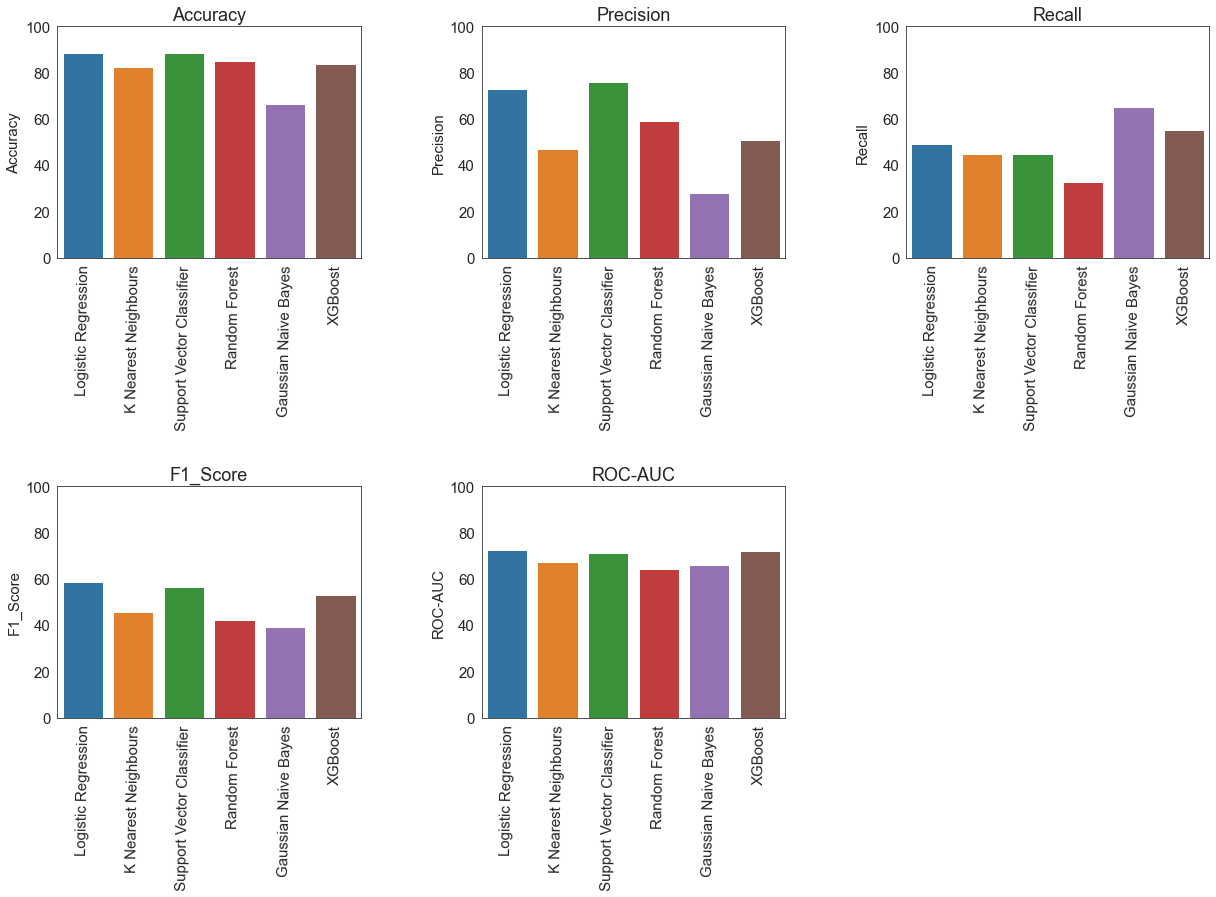

In [71]:
plot_results(df_smote_data)

ADASYN

In [72]:
adasyn = ADASYN(random_state=0)
x_adasyn, y_adasyn = adasyn.fit_resample(train_x, train_y)
print(Counter(y_adasyn), Counter(train_y))

Counter({0: 988, 1: 944}) Counter({0: 988, 1: 188})


In [73]:
X_adasyn_train, X_adasyn_val, y_adasyn_train, y_adasyn_val = train_test_split(x_adasyn, y_adasyn, test_size=0.2, random_state=0)
X_adasyn_train.shape, X_adasyn_val.shape, y_adasyn_train.shape, y_adasyn_val.shape

((1545, 40), (387, 40), (1545,), (387,))

In [74]:
X_adasyn_train_scaled = X_adasyn_train.copy()
X_adasyn_val_scaled = X_adasyn_val.copy()
test_scaled = test_x.copy()

for col in num_cols:
    mms = MinMaxScaler()
    mms.fit(X_adasyn_train[[col]])
    X_adasyn_train_scaled[col] = mms.transform(X_adasyn_train[[col]])
    X_adasyn_val_scaled[col] = mms.transform(X_adasyn_val[[col]])
    test_scaled[col] = mms.transform(test_x[[col]])

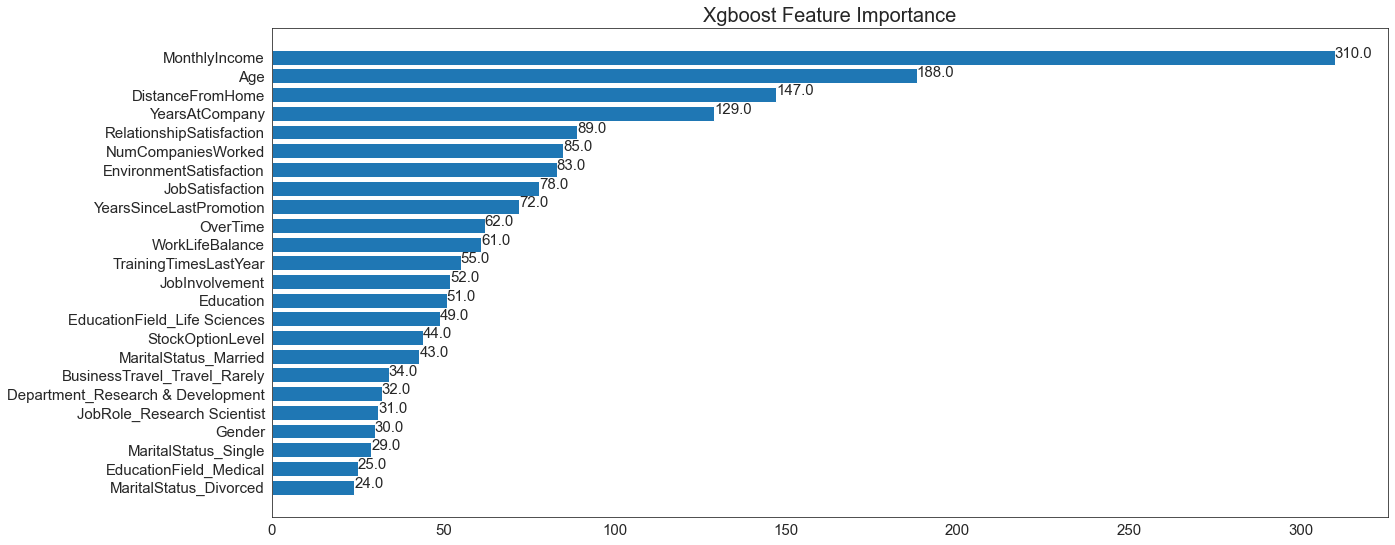

In [75]:
model = XGBClassifier(random_state=0)
model.fit(X_adasyn_train, y_adasyn_train)

feature_important = model.get_booster().get_score(importance_type='weight')
index = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=index, columns=["score"]).sort_values(by = "score", ascending=True)
data = data[data['score'] > 20]
xgb_cols = list(data.index)

font = {
    'size'   : 15
}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,9))
plt.barh(data.index, data['score'])
plt.title("Xgboost Feature Importance", fontsize=20)

values = list(data.score)
for i in range(len(xgb_cols)):
    plt.text(values[i], xgb_cols[i], str(values[i]))

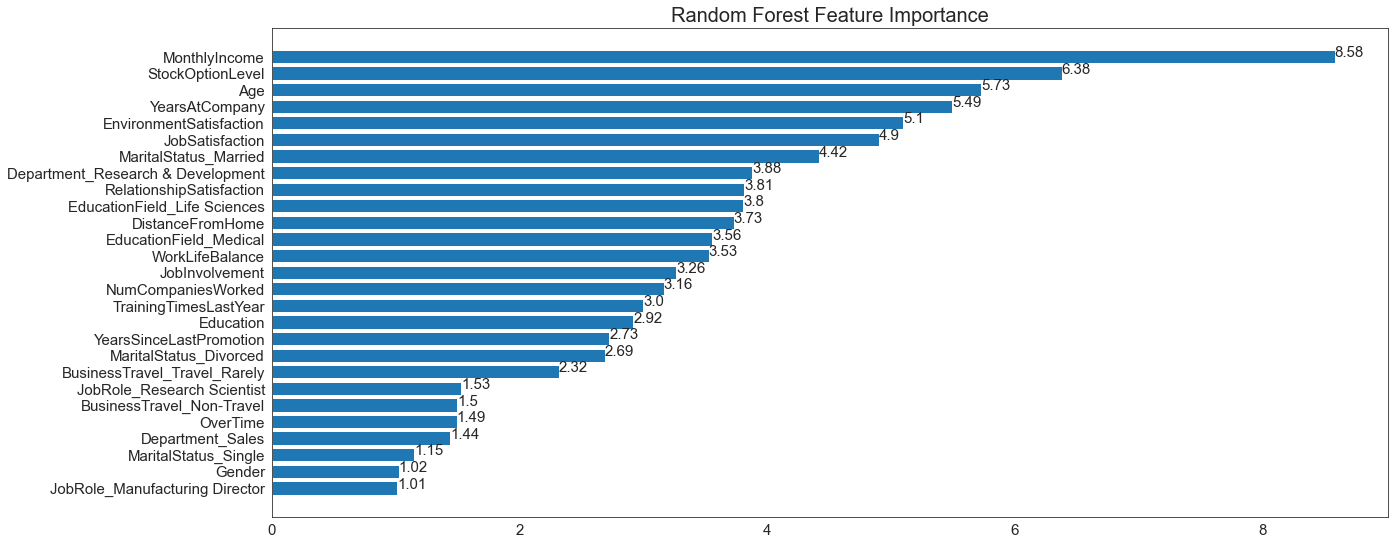

In [76]:
model = RandomForestClassifier(random_state=0)
model.fit(X_adasyn_train, y_adasyn_train)

values = model.feature_importances_ * 100
index = list(X_adasyn_train.columns)

data = pd.DataFrame(data=values, index=index, columns=["score"]).sort_values(by = "score", ascending=True)
data = data[data['score'] > 1]
rf_cols = list(data.index)

font = {
    'size'   : 15
}
matplotlib.rc('font', **font)
plt.figure(figsize=(20,9))
plt.barh(data.index, data['score'])
plt.title("Random Forest Feature Importance", fontsize=20)

values = list(data.score)
for i in range(len(rf_cols)):
    plt.text(values[i], rf_cols[i], str(round(values[i], 2)))

In [77]:
results_adasyn = all_algorithm_results(X_adasyn_train_scaled, y_adasyn_train, X_adasyn_val_scaled, y_adasyn_val, test_scaled, test_y, 
                     X_adasyn_train, X_adasyn_val, test_x, xgb_cols, rf_cols)

---------------------------Logistic Regression-----------------------------
Train data results
Accuracy: 89.77 %
Precision: 95.17 %
Recall: 83.36 %
F1 Score: 88.87 %
ROC-AUC Score: 89.65 %


Validation data results
Accuracy: 90.96 %
Precision: 94.71 %
Recall: 86.1 %
F1 Score: 90.2 %
ROC-AUC Score: 90.8 %


Test data results
Accuracy: 88.1 %
Precision: 70.59 %
Recall: 48.98 %
F1 Score: 57.83 %
ROC-AUC Score: 72.45 %


---------------------------K Nearest Neighbours-----------------------------
Train data results
Accuracy: 91.52 %
Precision: 91.96 %
Recall: 90.62 %
F1 Score: 91.28 %
ROC-AUC Score: 91.5 %


Validation data results
Accuracy: 90.18 %
Precision: 89.01 %
Recall: 90.91 %
F1 Score: 89.95 %
ROC-AUC Score: 90.2 %


Test data results
Accuracy: 82.31 %
Precision: 46.51 %
Recall: 40.82 %
F1 Score: 43.48 %
ROC-AUC Score: 65.71 %


---------------------------Support Vector Classifier-----------------------------
Train data results
Accuracy: 92.43 %
Precision: 97.9 %
Recall: 86.39 %
F1

In [78]:
df_adasyn_data = pd.DataFrame(results_adasyn, columns=['Model Name', 'Train Data', 'Validation Data', 'Test Data'])
df_adasyn_data[['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC-AUC']] = pd.DataFrame(df_adasyn_data['Test Data'].to_list())
df_adasyn_data.drop(['Train Data', 'Validation Data', 'Test Data'], axis=1, inplace=True)

In [79]:
df_adasyn_data

,Model Name,Accuracy,Precision,Recall,F1_Score,ROC-AUC
0,Logistic Regression,88.10,70.59,48.98,57.83,72.45
1,K Nearest Neighbours,82.31,46.51,40.82,43.48,65.71
2,Support Vector Classifier,86.39,64.52,40.82,50.00,68.16
3,Random Forest,85.37,62.50,30.61,41.10,63.47
4,Gaussian Naive Bayes,64.29,27.42,69.39,39.31,66.33
5,XGBoost,80.27,41.82,46.94,44.23,66.94


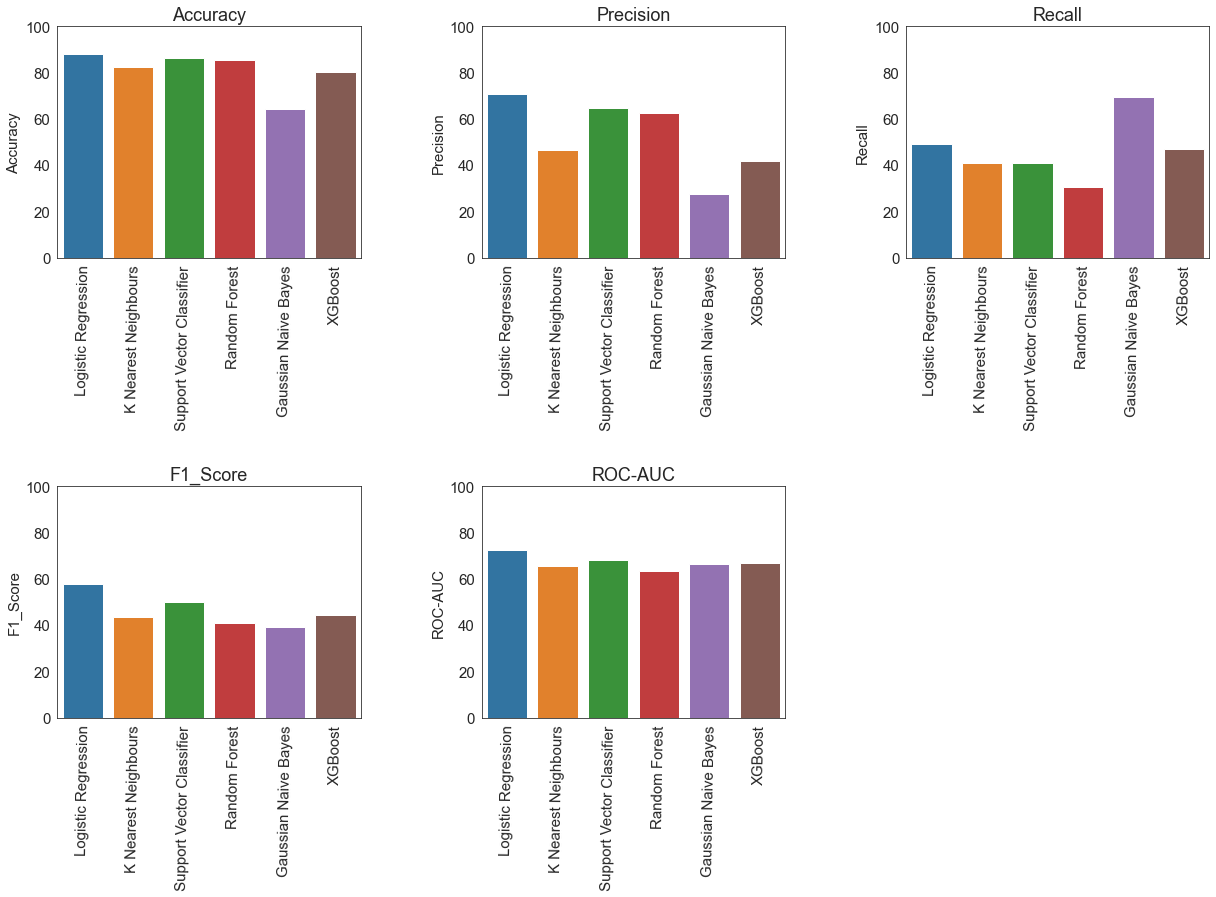

In [80]:
plot_results(df_adasyn_data)

In [81]:
def plot_results_comparison(col='Recall', label='Recall', dataset_lable='Test'):
    plt.figure(figsize=(12,6))

    models = df_original_data['Model Name']

    # line 1 points
    values = df_original_data[col]
    plt.plot(models, values, label = "Original data without sampling")

    # line 3 points
    values = df_ros_data[col]
    plt.plot(models, values, label = "Random Over Sampling")

    # line 5 points
    values = df_smote_data[col]
    plt.plot(models, values, label = "SMOTE Sampling")

    # line 7 points
    values = df_adasyn_data[col]
    plt.plot(models, values, label = "ADASYN Sampling")

    # Plot the results
    plt.xlabel('Model Name')
    plt.ylabel(f'{label} Score')
    plt.title(f'Comparing {label} Scores for different sampling techniques')
    plt.xticks(rotation=75)
    plt.ylim(0, 100)
    plt.legend(fontsize=10)
    plt.show()

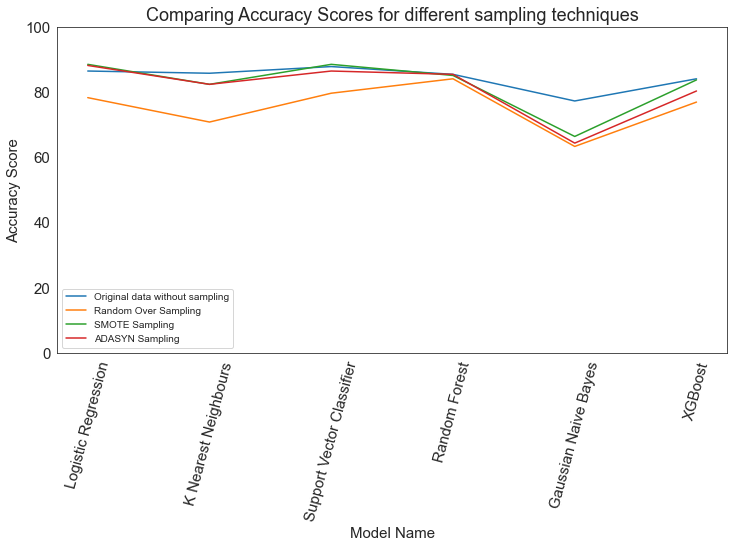

In [82]:
plot_results_comparison(col='Accuracy', label='Accuracy')

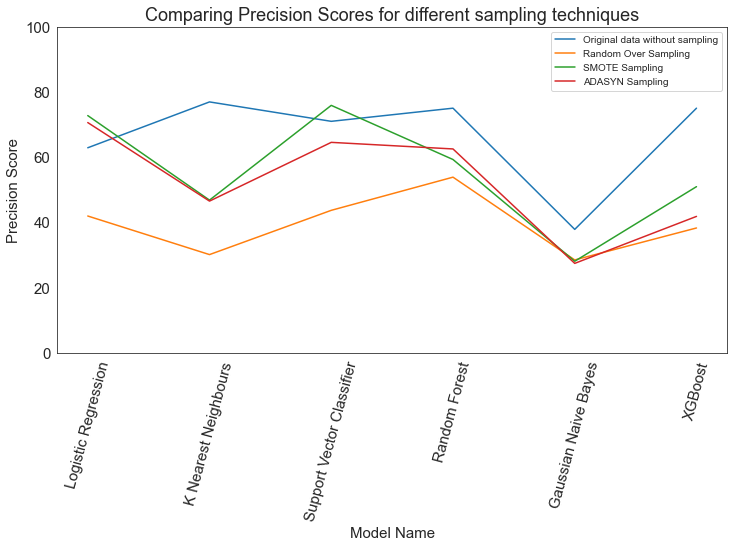

In [83]:
plot_results_comparison(col='Precision', label='Precision')

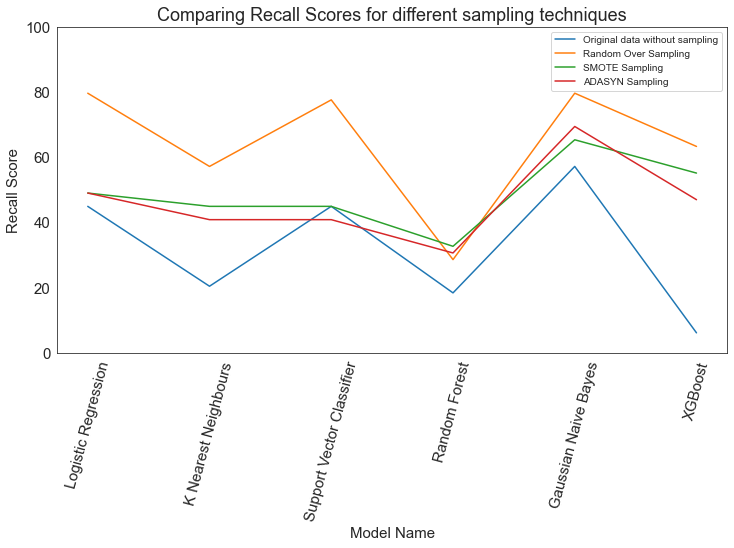

In [84]:
plot_results_comparison()

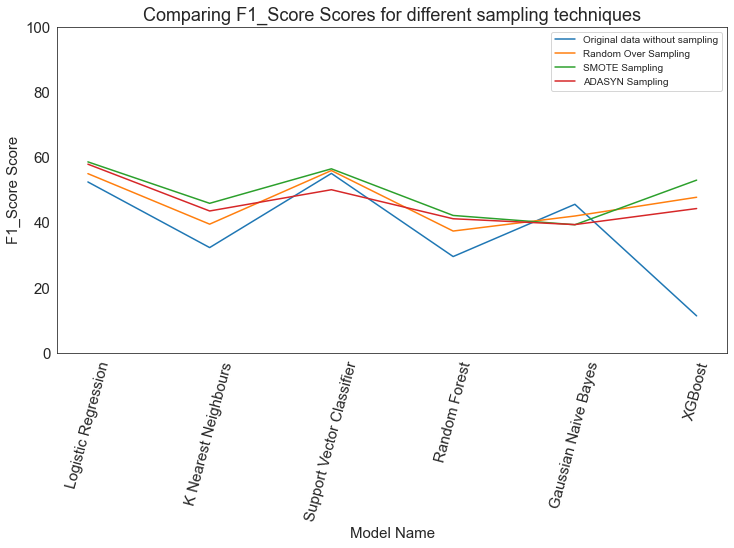

In [85]:
plot_results_comparison(col='F1_Score', label='F1_Score')

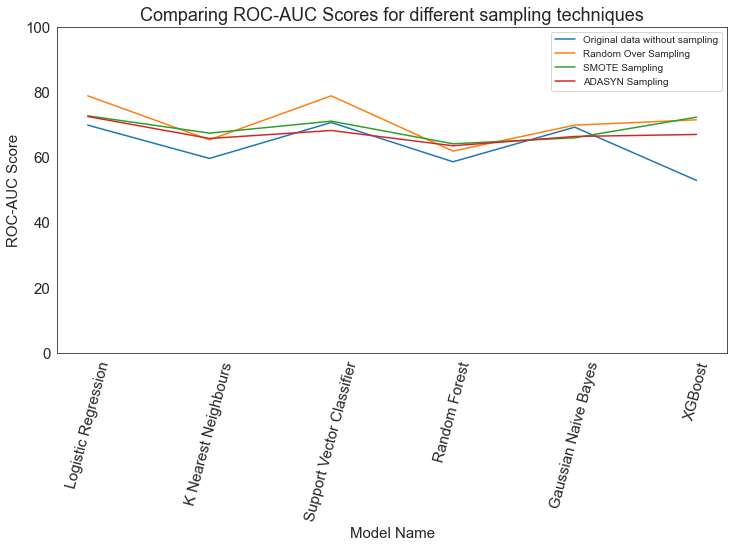

In [86]:
plot_results_comparison(col='ROC-AUC', label='ROC-AUC')